In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

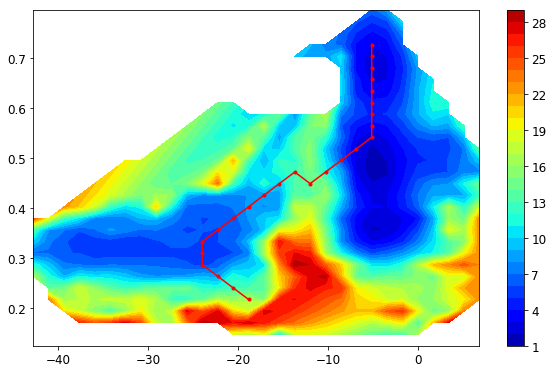

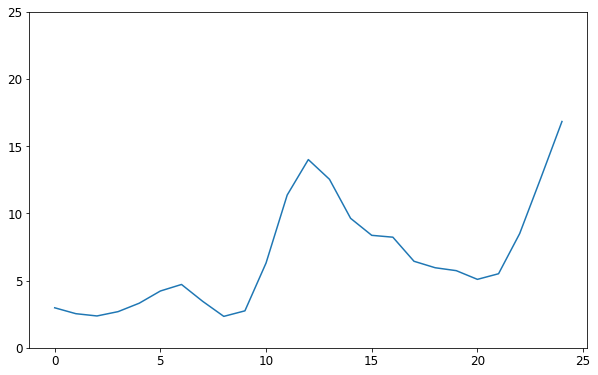

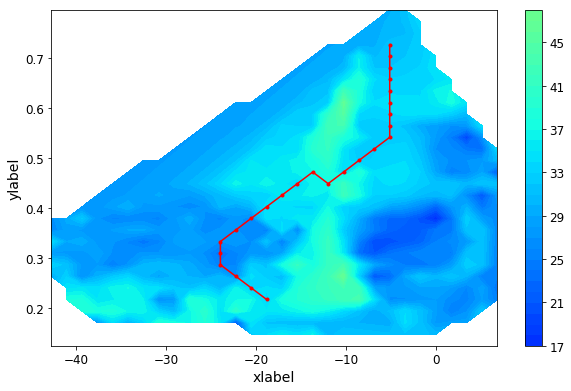

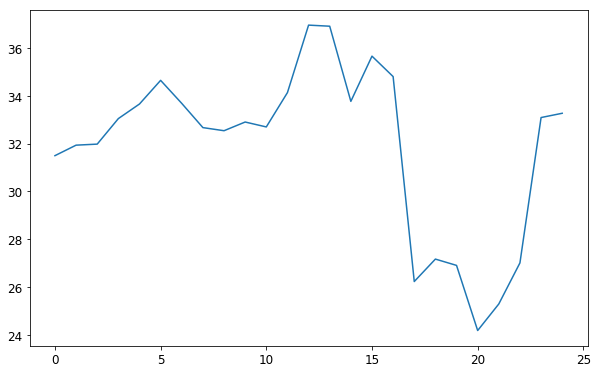

In [27]:
pre = "/Users/weilu/Research/server/mar_2018/05_week/"
temp = 280
location = pre + "/eighth_with_real_distance/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), block=[-20,-10,0.6,0.7], end=(26,22), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# # plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

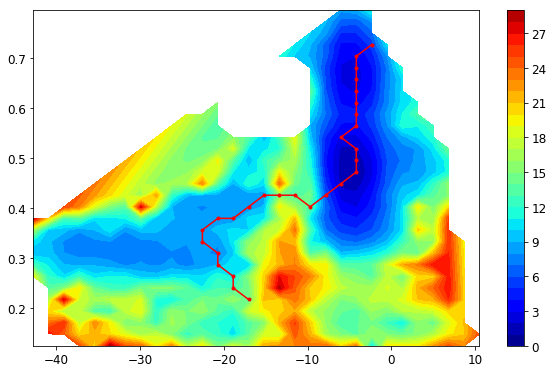

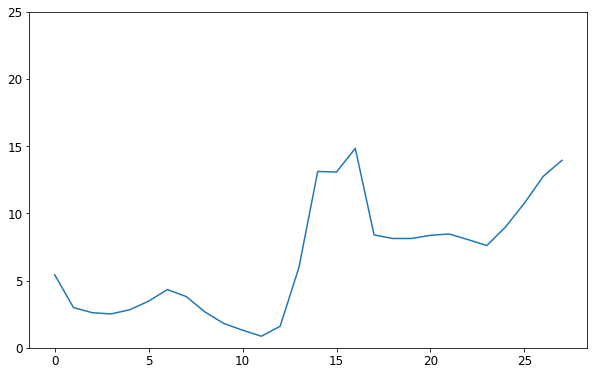

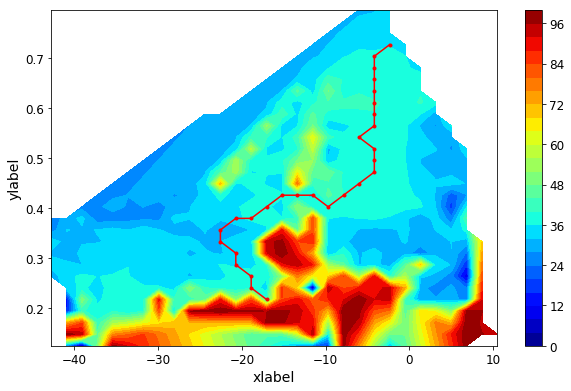

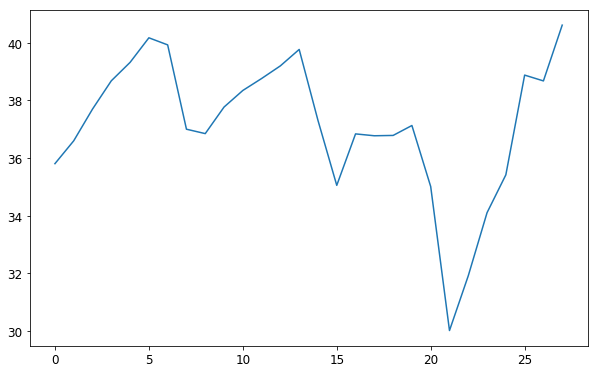

In [31]:
pre = "/Users/weilu/Research/server/mar_2018/05_week/"
temp = 280
location = pre + "/eighth_with_real_distance/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), block=[-20,-10,0.55,0.7], end=(26,22), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# # plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

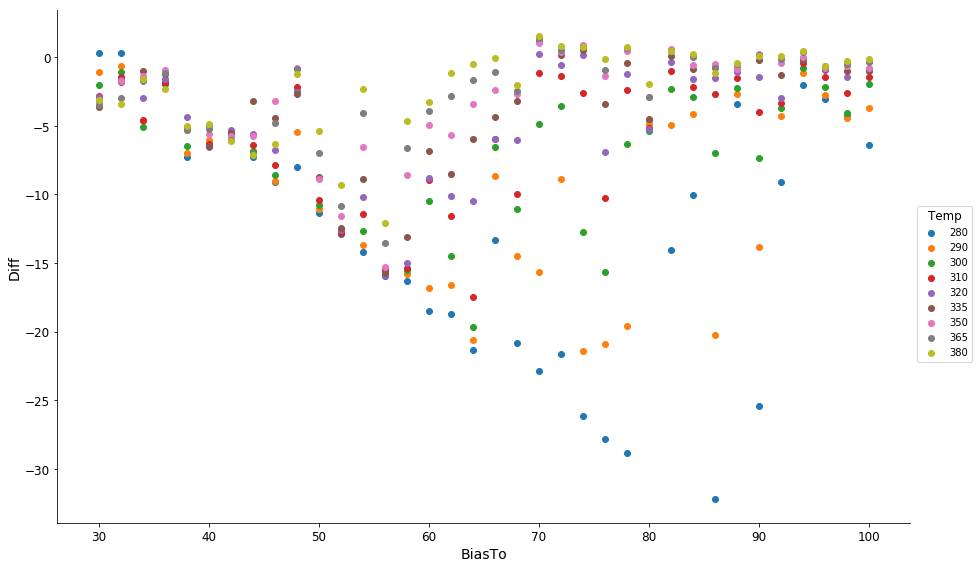

In [36]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/eighth/rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_1_27_Mar_231139.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

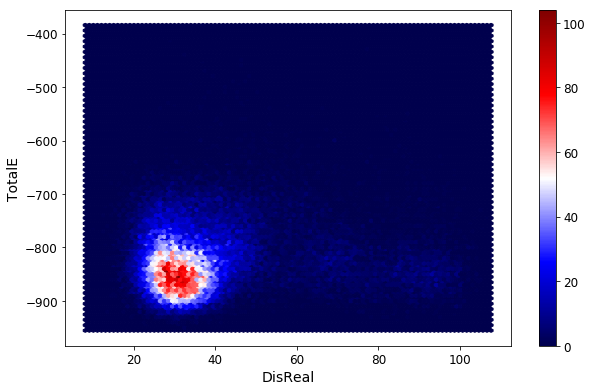

In [37]:
# rerun 1 
data.query("z_h6 < -20 and Qw > 0.25 and Qw < 0.35").plot.hexbin("DisReal", "TotalE", cmap="seismic", sharex=False)

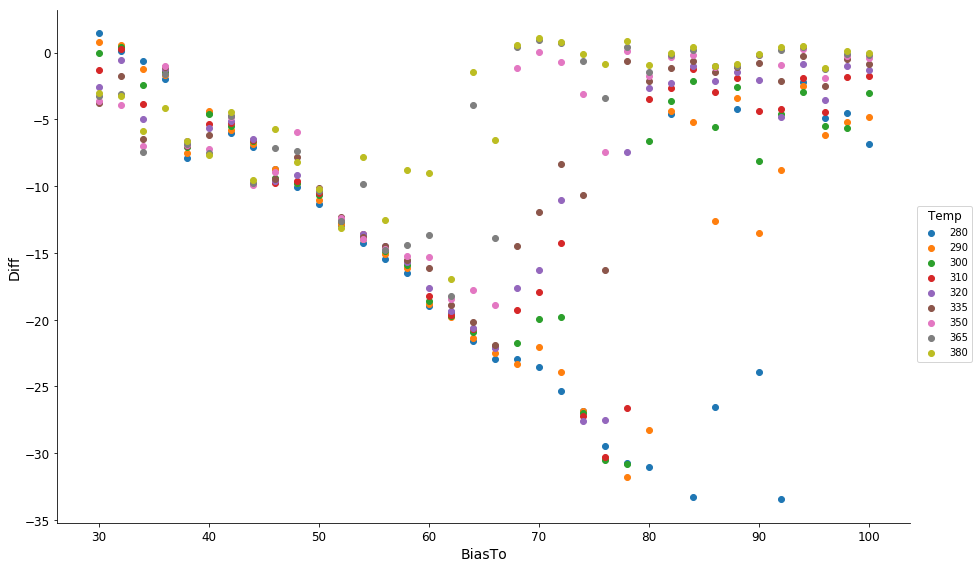

In [32]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/eighth/rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_3_27_Mar_231139.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [78]:
a = np.loadtxt("/Users/weilu/Research/server/apr_2018/TMHC2/test/rnative.dat")

In [79]:
a.shape

(156, 156)

In [108]:
a.min()

0.0

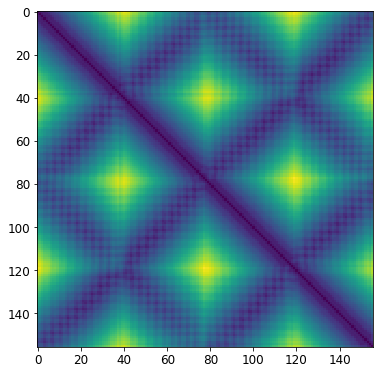

In [81]:
plt.imshow(a)

In [82]:
table = {"A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"}

In [86]:
scTMHC2_seq = "MTRTEIIRELERSLRLQLVLAIFLMALLIVLLWLQQNGSSNNNVNYLLIVILVLVLVIVALAVIQKYLVEQLKRQADPTDDSRTEIIRELERSLRLQLVLAIFLMALLIVLLWLQQNGSSNNNVNYLLIVILVLVLVIVALAVTQKYLVEQLKRQD"

In [88]:
t = "MTRTEIIRELERSLRLQLVLAIFLMALLIVLLWLQQNGSSNNNVNYLLIVILVLVLVIVALAVIQKYLVEQLKRQADPTDDSRTEIIRELERSLRLQLVLAIFLMALLIVLLWLQQNGSSNNNVNYLLIVILVLVLVIVALAVTQKYLVEQLKRQD"

In [98]:
list(set(t))

['K',
 'R',
 'T',
 'Q',
 'Y',
 'G',
 'S',
 'P',
 'V',
 'F',
 'L',
 'W',
 'M',
 'A',
 'I',
 'N',
 'E',
 'D']

In [106]:
"G"*156

'GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG'

In [89]:
scTMHC2_seq == t

True

In [100]:
from collections import defaultdict

In [101]:
>>> s = t
>>> d = defaultdict(int)
>>> for k in s:
...     d[k] += 1
...
>>> d.items()

dict_items([('M', 3), ('T', 5), ('R', 10), ('E', 8), ('I', 15), ('L', 38), ('S', 7), ('Q', 12), ('V', 20), ('A', 9), ('F', 2), ('W', 2), ('N', 10), ('G', 2), ('Y', 4), ('K', 4), ('D', 4), ('P', 1)])

In [ ]:
for i in scTMHC2_seq:
    dic[i] += 1

In [91]:
for i in scTMHC2_seq:
    if i not in table:
        print(i)

In [75]:
start = 2
end = 38
helix1 = " ".join([str(i) for i in list(range(start*3-2, end*3+1))])
start = 43
end = 75
helix2 = " ".join([str(i) for i in list(range(start*3-2, end*3+1))])
start = 80
end = 117
helix3 = " ".join([str(i) for i in list(range(start*3-2, end*3+1))])
start = 123
end = 154
helix4 = " ".join([str(i) for i in list(range(start*3-2, end*3+1))])

In [76]:
print(helix1)
print(helix2)
print(helix3)
print(helix4)

4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 30

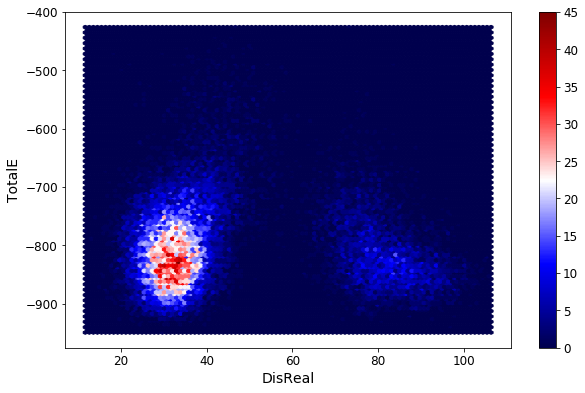

In [33]:
# rerun 3
data.query("z_h6 < -20 and Qw > 0.25 and Qw < 0.35").plot.hexbin("DisReal", "TotalE", cmap="seismic", sharex=False)

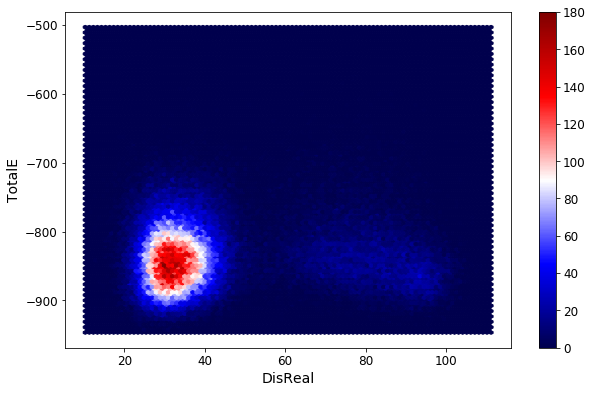

In [35]:
data.query("z_h6 < -20 and Qw > 0.25 and Qw < 0.35").plot.hexbin("DisReal", "TotalE", cmap="seismic", sharex=False)

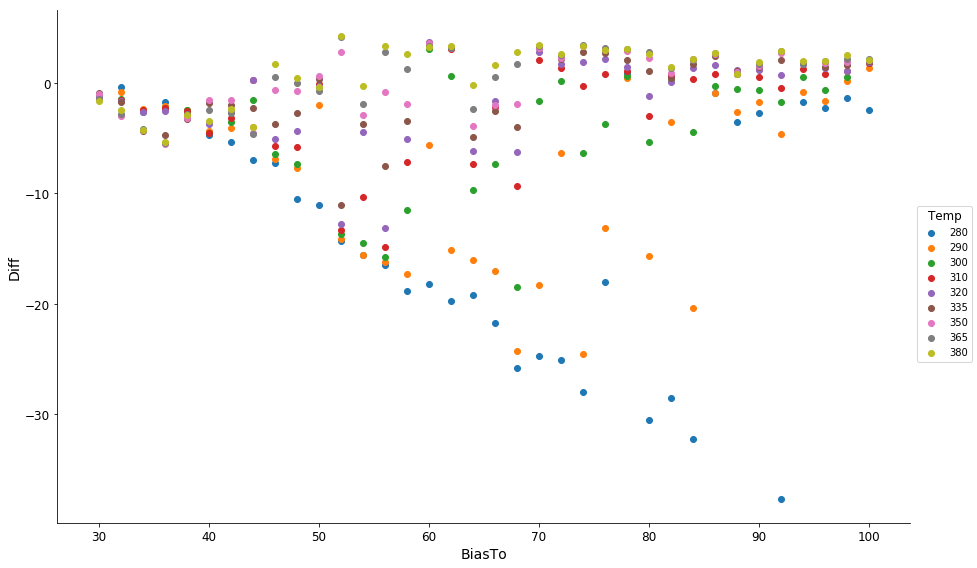

In [34]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/eighth/force_0.03_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_3_30_Mar_135549.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

## i235d

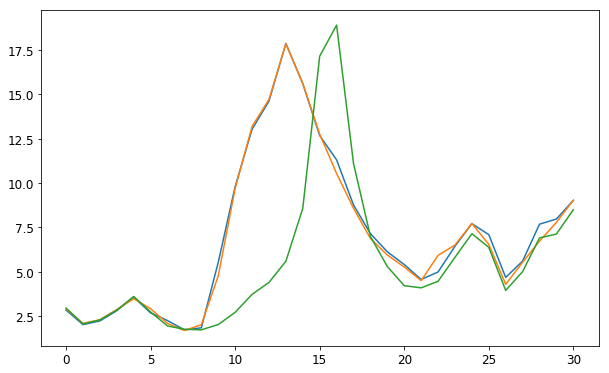

In [133]:
plt.plot(range(len(f)), i235d,range(len(f)), orignal_2, range(len(f)), i255d)

In [112]:
origianl = f

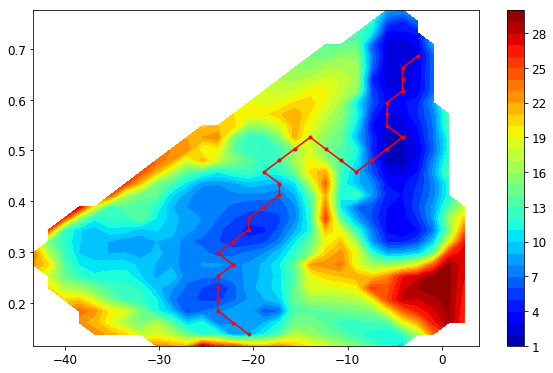

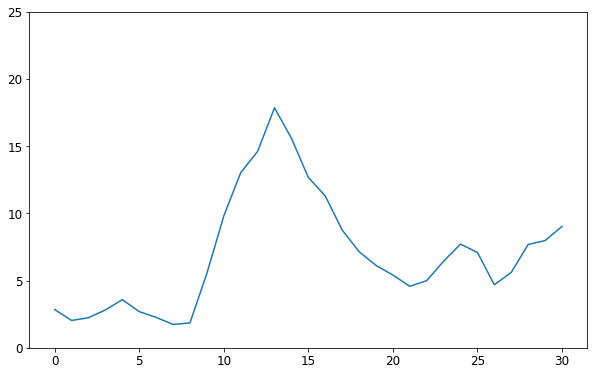

In [132]:
pre = "/Users/weilu/Research/server/apr_2018/01_week/"
temp = 260
location = pre + "/sixth_i235d/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
# location2 = location + f"evpb-{temp}.dat"
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# # plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)
i235d = f

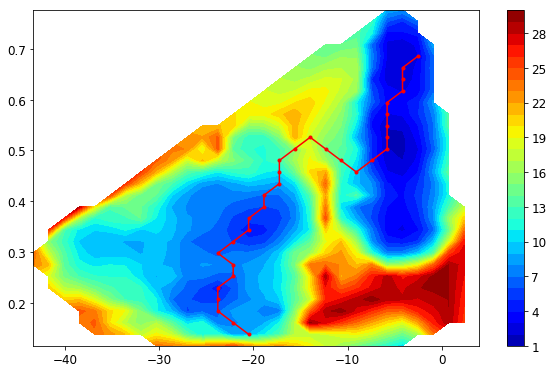

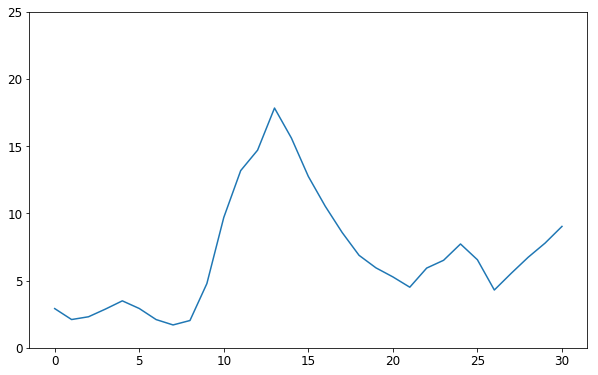

In [22]:
pre = "/Users/weilu/Research/server/apr_2018/01_week/"
temp = 260
location = pre + "/sixth_orignal/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
# location2 = location + f"evpb-{temp}.dat"
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# # plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)
orignal_2 = f

## higher force

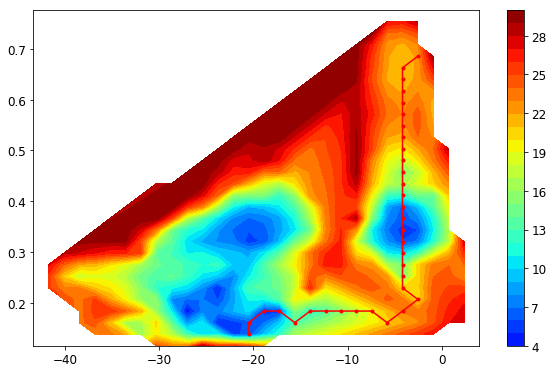

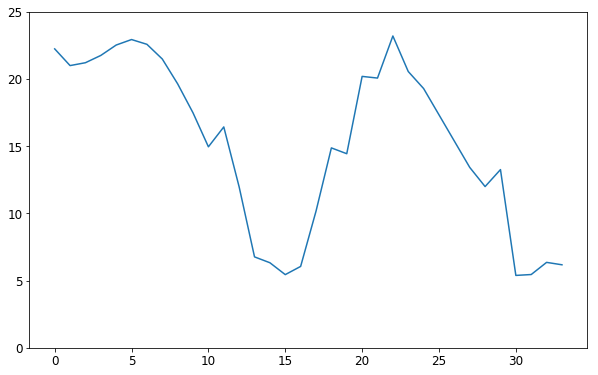

In [31]:
pre = "/Users/weilu/Research/server/apr_2018/01_week/"
temp = 260
location = pre + "/sixth_orignal/_280-350/2d_z_qw/force_0.4/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
# location2 = location + f"evpb-{temp}.dat"
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# # plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

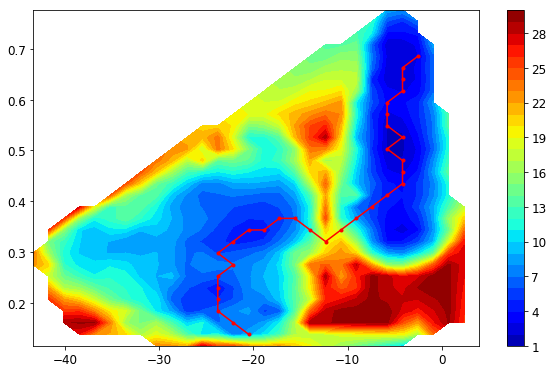

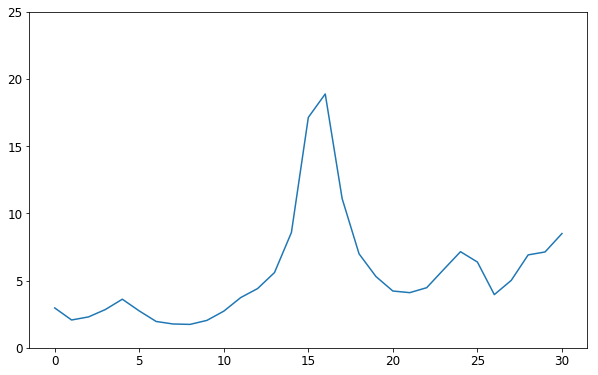

In [4]:
pre = "/Users/weilu/Research/server/apr_2018/01_week/"
temp = 260
location = pre + "/sixth_i255d/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
# location2 = location + f"evpb-{temp}.dat"
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# # plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)
i255d = f

FileNotFoundError: [Errno 2] No such file or directory: '/Users/weilu/Research/server/mar_2018/05_week//sixth_i235d/_280-350/2d_z_qw/force_0.2/evpb-260.dat'

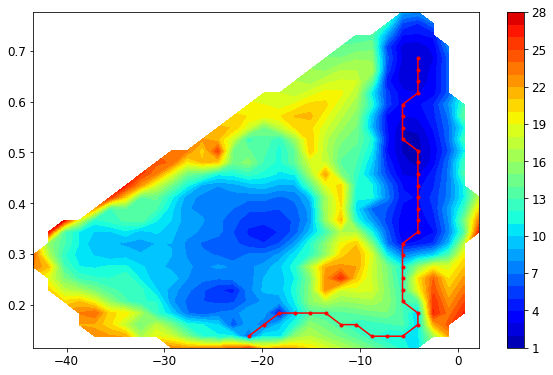

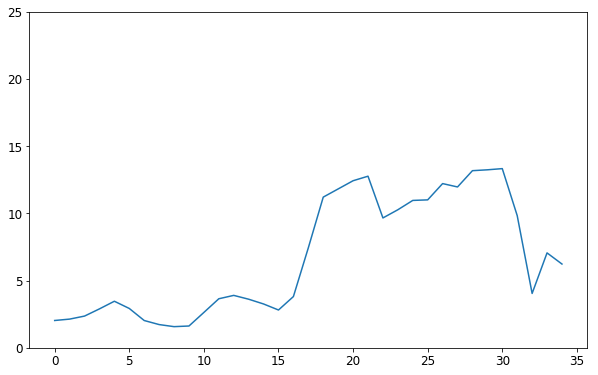

In [25]:
pre = "/Users/weilu/Research/server/mar_2018/05_week/"
temp = 260
location = pre + "/sixth_i235d/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

In [262]:
t = np.loadtxt(location2)

In [263]:
tt = np.where(np.isnan(t), 32, t)

In [259]:
t = t[~np.isnan(t).any(axis=1)] 

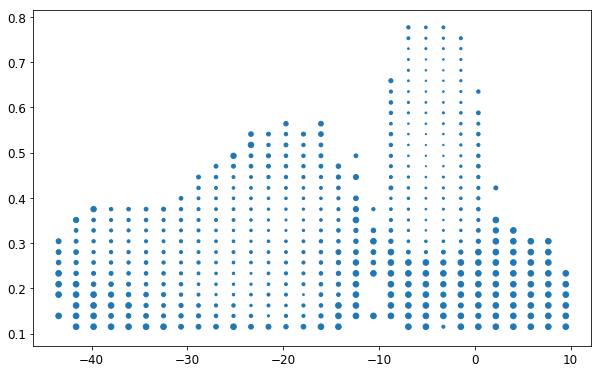

In [264]:
plt.scatter(tt[:,1], tt[:,2], tt[:,3])

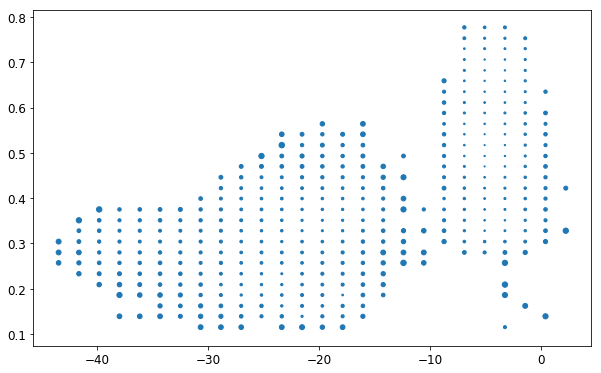

In [238]:
plt.scatter(t[:,1], t[:,2], t[:,3])

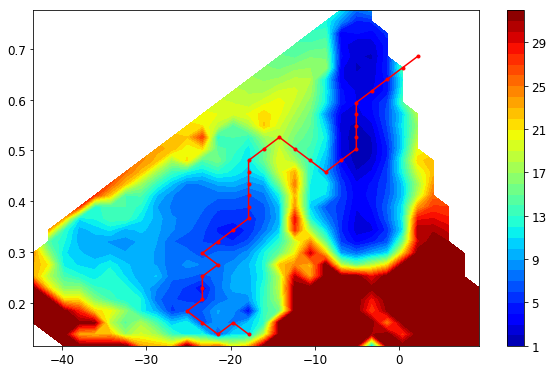

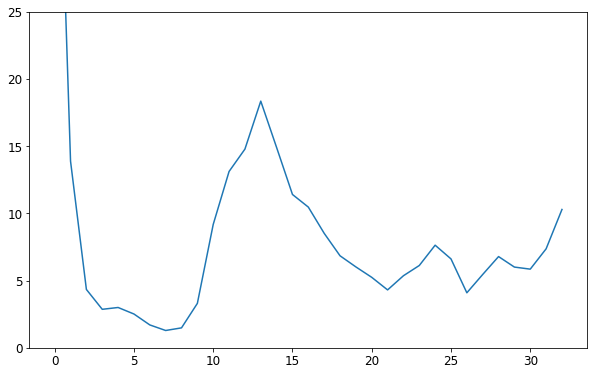

In [269]:
pre = "/Users/weilu/Research/server/mar_2018/05_week"
temp = 260
location = pre + "/sixth_i235d/_280-350/2d_z_qw/force_0.2/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), plot1d=True, save=False, zmax=32)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
# location2 = location + f"evpb-{temp}.dat"
# (xi,yi,zi) = plot2d(location2, zmax=100)
# plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# # plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
# plt.figure()
# f_on_path = [zi[tuple(p)] for p in reversed(path)]
# plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

## Ninth freeEnergy
apply 0.06 force,
check force 0.05 later.
q 0.3, z=-20 is a region I hope the expected distance to be 80.

In [329]:
t = np.loadtxt(location2)

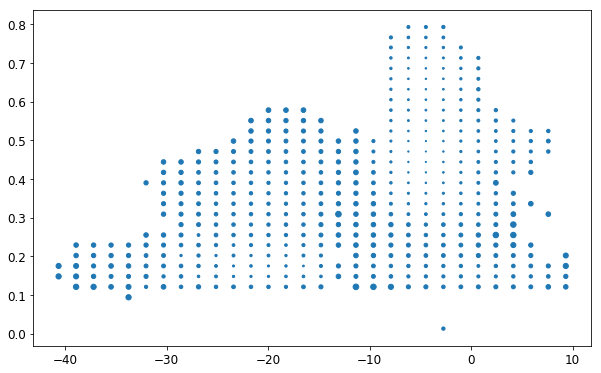

In [333]:
plt.scatter(t[:,1], t[:,2], t[:,3])

In [339]:
tt

array([[  5.00000000e+00,  -4.06340000e+01,   1.48000000e-01, ...,
          0.00000000e+00,  -1.30005700e+03,  -1.32762600e+03],
       [  6.00000000e+00,  -4.06340000e+01,   1.75000000e-01, ...,
          0.00000000e+00,  -1.31851000e+03,  -1.34470900e+03],
       [  3.40000000e+01,  -3.89110000e+01,   1.21000000e-01, ...,
          0.00000000e+00,  -1.20744800e+03,  -1.23625200e+03],
       ..., 
       [  8.75000000e+02,   9.32900000e+00,   1.48000000e-01, ...,
          0.00000000e+00,  -1.46979300e+03,  -1.48809600e+03],
       [  8.76000000e+02,   9.32900000e+00,   1.75000000e-01, ...,
          0.00000000e+00,  -1.37493100e+03,  -1.40183000e+03],
       [  8.77000000e+02,   9.32900000e+00,   2.02000000e-01, ...,
          0.00000000e+00,  -1.38906000e+03,  -1.41404800e+03]])

In [342]:
res = 30
xi = np.linspace(min(t[:,1]), max(t[:,1]), res)
yi = np.linspace(min(t[:,2]), max(t[:,2]), res)

In [344]:
yi

array([ 0.013     ,  0.03989655,  0.0667931 ,  0.09368966,  0.12058621,
        0.14748276,  0.17437931,  0.20127586,  0.22817241,  0.25506897,
        0.28196552,  0.30886207,  0.33575862,  0.36265517,  0.38955172,
        0.41644828,  0.44334483,  0.47024138,  0.49713793,  0.52403448,
        0.55093103,  0.57782759,  0.60472414,  0.63162069,  0.65851724,
        0.68541379,  0.71231034,  0.7392069 ,  0.76610345,  0.793     ])

In [341]:
xi

array([-40.634     , -38.91113793, -37.18827586, -35.46541379,
       -33.74255172, -32.01968966, -30.29682759, -28.57396552,
       -26.85110345, -25.12824138, -23.40537931, -21.68251724,
       -19.95965517, -18.2367931 , -16.51393103, -14.79106897,
       -13.0682069 , -11.34534483,  -9.62248276,  -7.89962069,
        -6.17675862,  -4.45389655,  -2.73103448,  -1.00817241,
         0.71468966,   2.43755172,   4.16041379,   5.88327586,
         7.60613793,   9.329     ])

In [356]:
mask = np.ones((res,res))*32
zi = t[:,3]
index_list = t[:,0]
count = 0
for i in range(res):
    for j in range(res):
        pos = i*res + j
        if count < len(index_list):
            if pos == int(index_list[count]):
                mask[i][j] = zi[count]
                count += 1

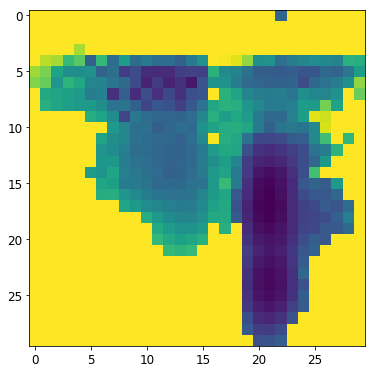

In [359]:
plt.imshow(mask.T)

In [353]:
index_li

(440,)

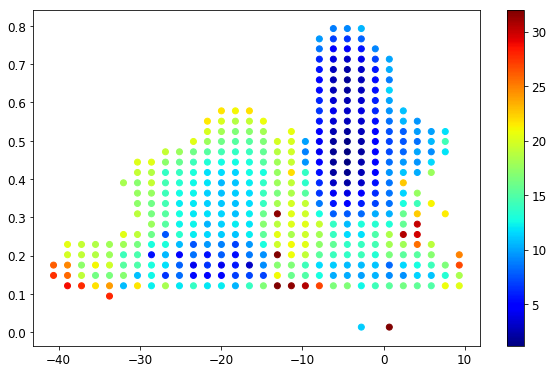

In [338]:
t = np.loadtxt(location2)
tt = np.where(np.isnan(t), 32, t)
# t = t[~np.isnan(t).any(axis=1)] 
t = tt
plt.scatter(t[:,1], t[:,2], c=t[:,3], cmap="jet")
plt.colorbar()

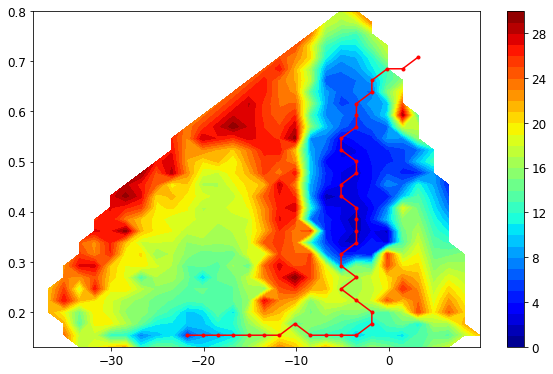

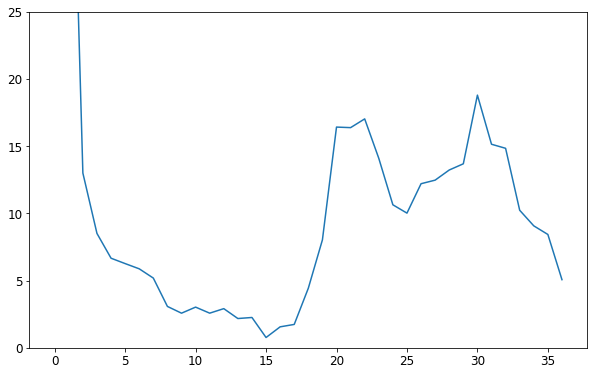

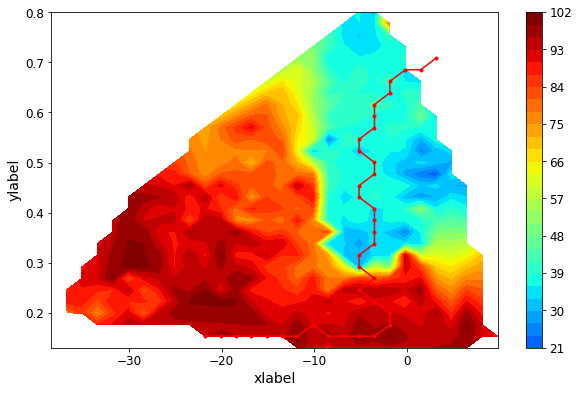

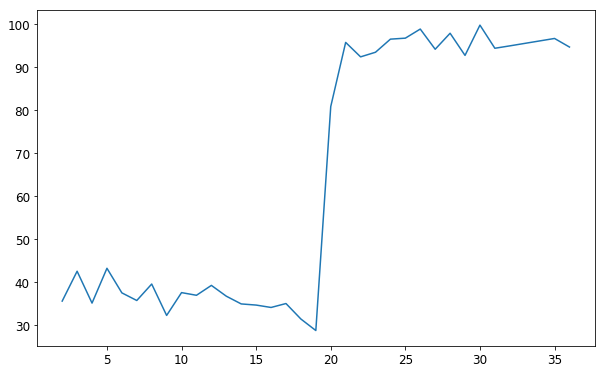

In [223]:
pre = "/Users/weilu/Research/server/apr_2018/01_week"
temp = 330
location = pre + "/ninth_freeEnergy_7_less_temp/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), block=[-15,-10,0.0,0.1], plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

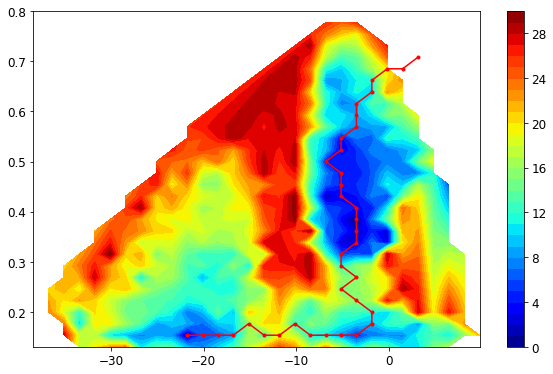

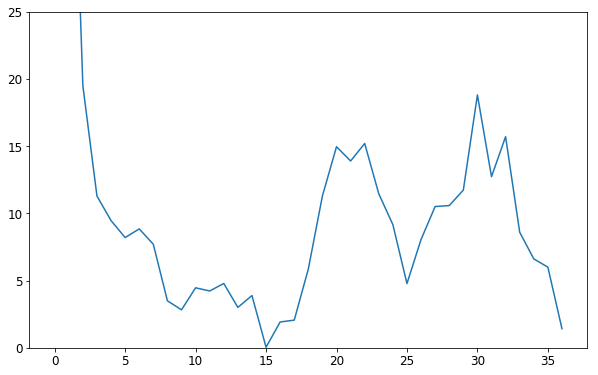

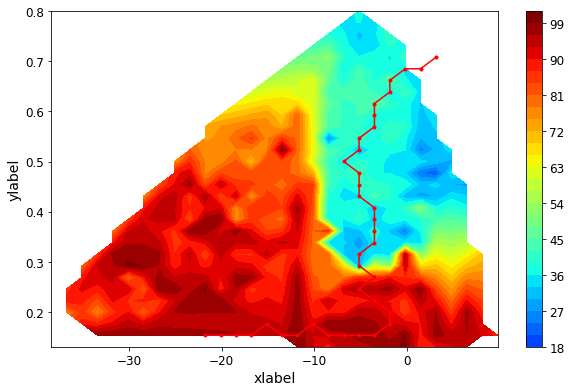

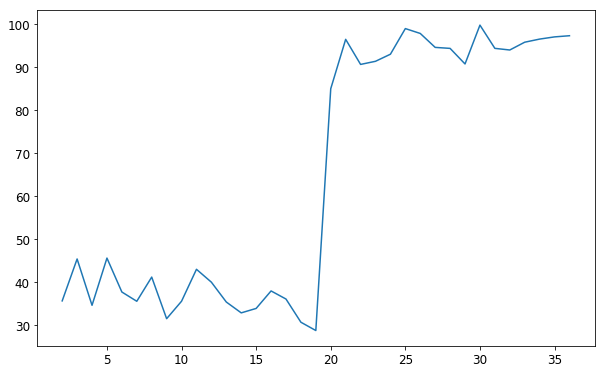

In [209]:
pre = "/Users/weilu/Research/server/apr_2018/01_week"
temp = 350
location = pre + "/ninth_freeEnergy_7_less_temp/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), block=[-15,-10,0.0,0.1], plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

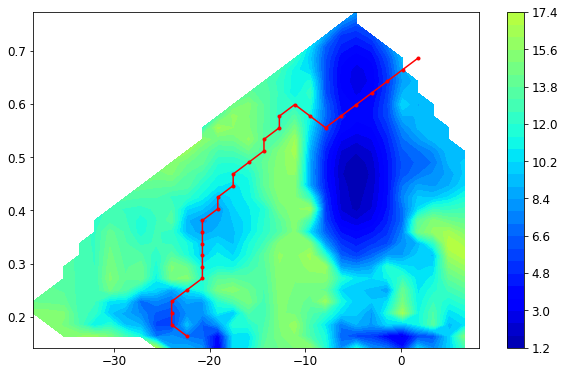

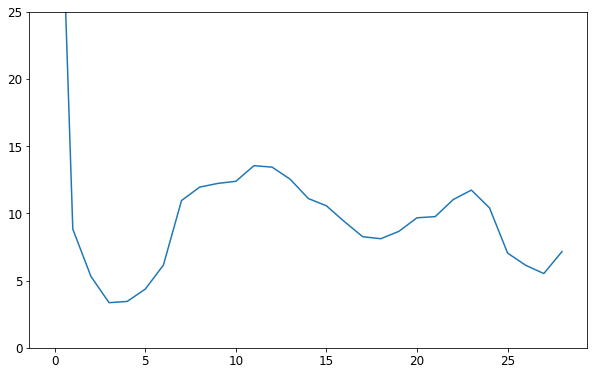

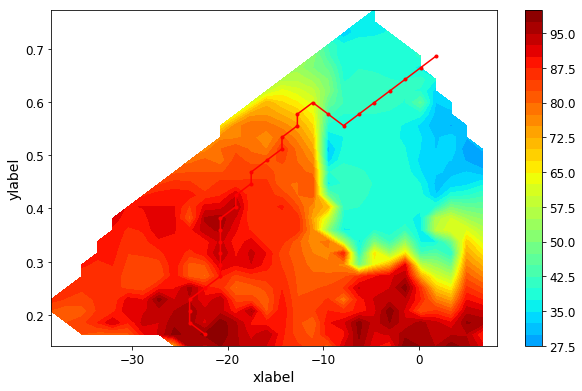

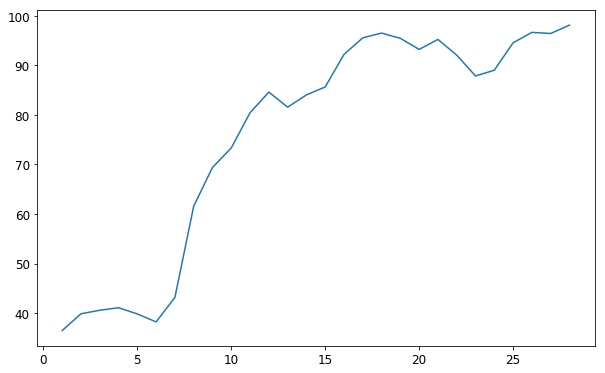

In [102]:
pre = "/Users/weilu/Research/server/apr_2018/01_week"
temp = 300
location = pre + "/ninth_freeEnergy_5_less_temp/_280-350/2d_z_qw/less_bias_force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), block=[-15,-10,0.0,0.1], plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

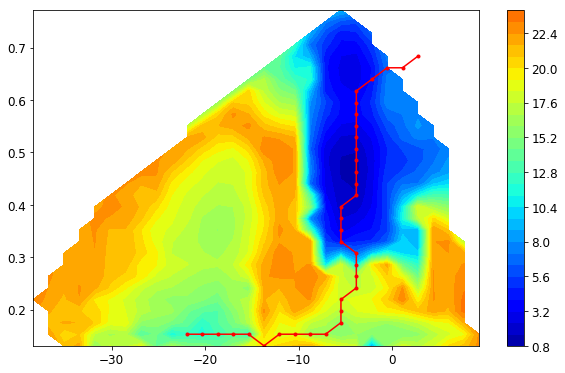

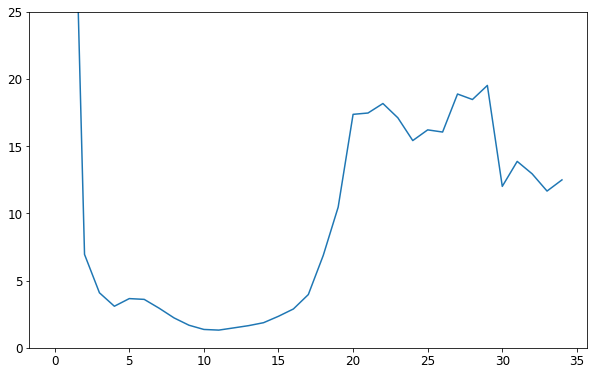

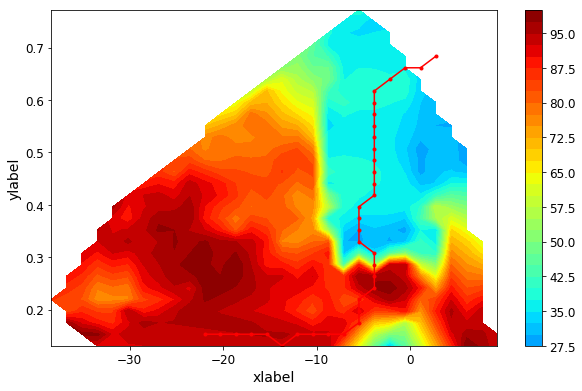

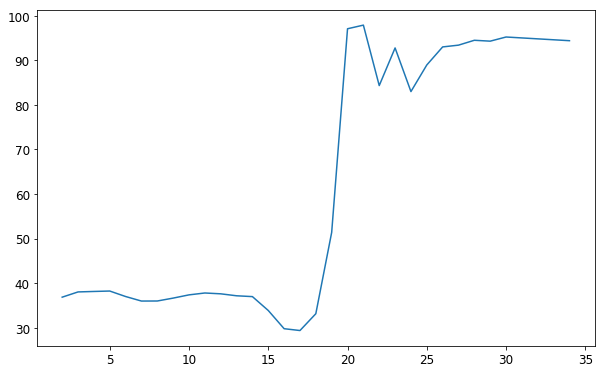

In [89]:
pre = "/Users/weilu/Research/server/apr_2018/01_week"
temp = 300
location = pre + "/ninth_freeEnergy_5_less_temp/_280-350/2d_z_qw/quick/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), block=[-15,-10,0.0,0.1], plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

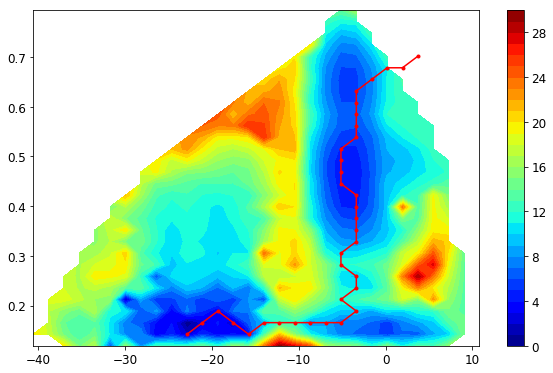

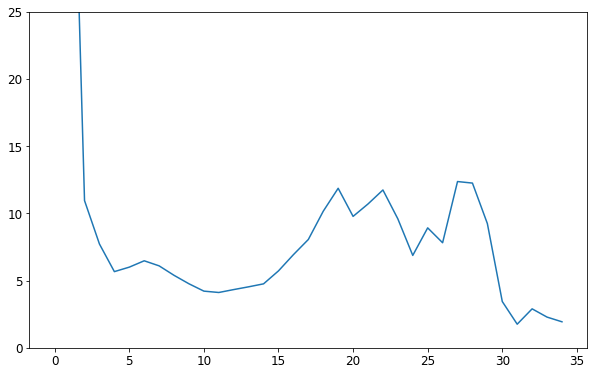

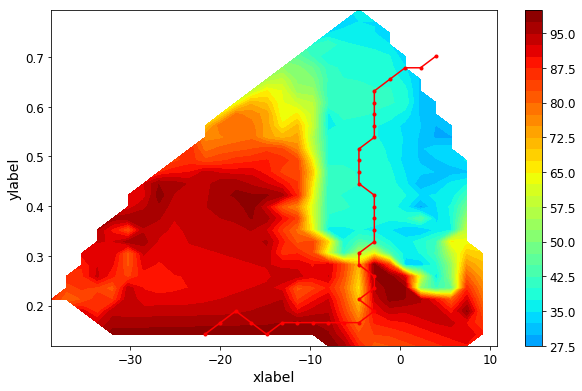

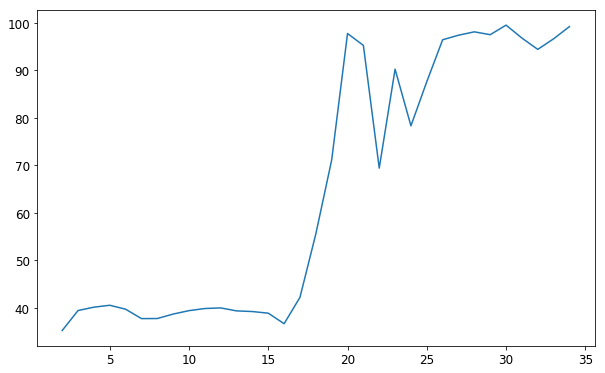

In [95]:
pre = "/Users/weilu/Research/server/apr_2018/01_week"
temp = 300
location = pre + "/ninth_freeEnergy_5/_280-350/2d_z_qw/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), block=[-15,-10,0.0,0.1], plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

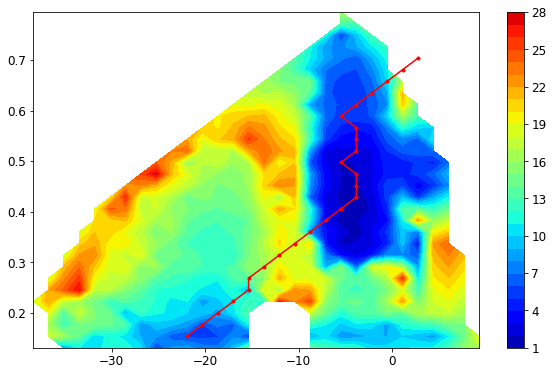

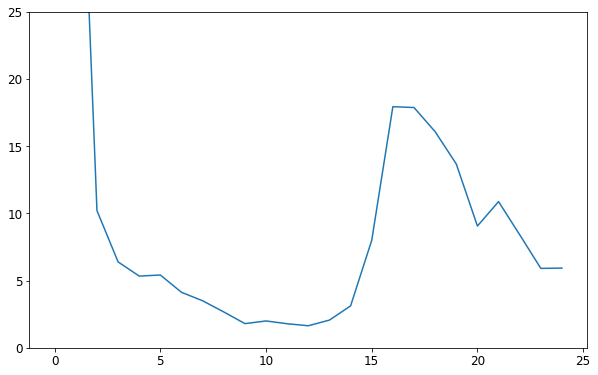

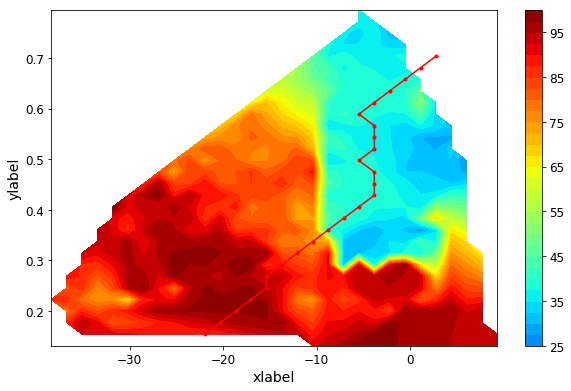

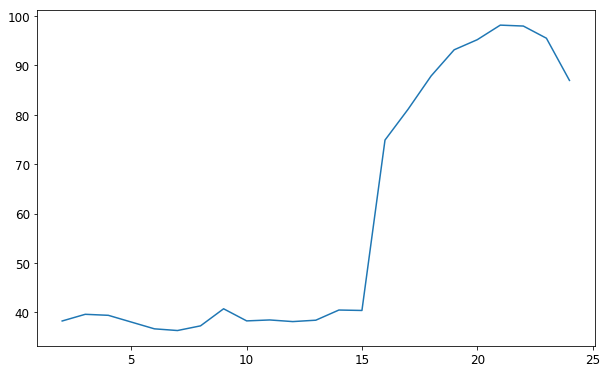

In [20]:
pre = "/Users/weilu/Research/server/apr_2018/01_week"
temp = 320
location = pre + "/ninth_freeEnergy_5_less_temp/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), block=[-15,-10,0.0,0.2], plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

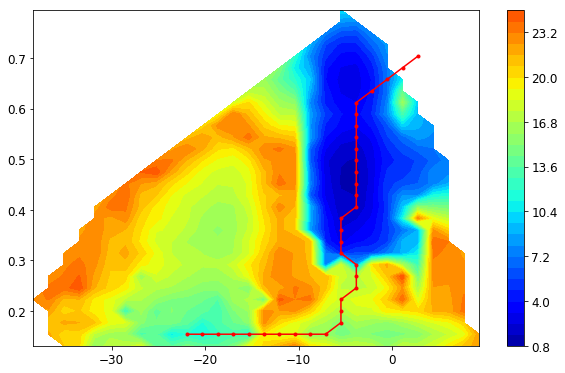

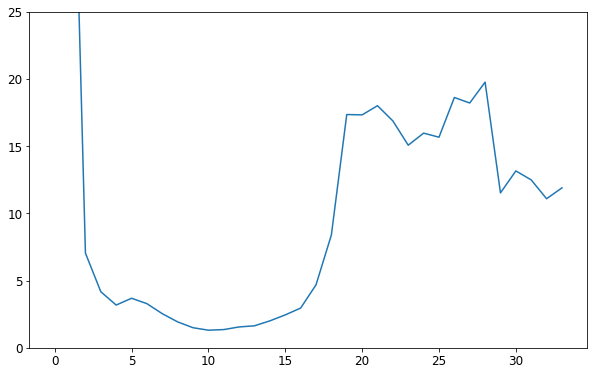

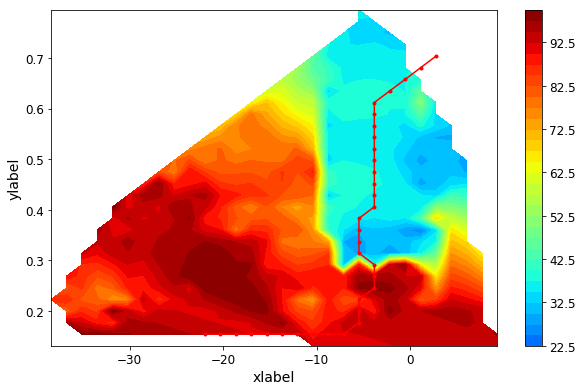

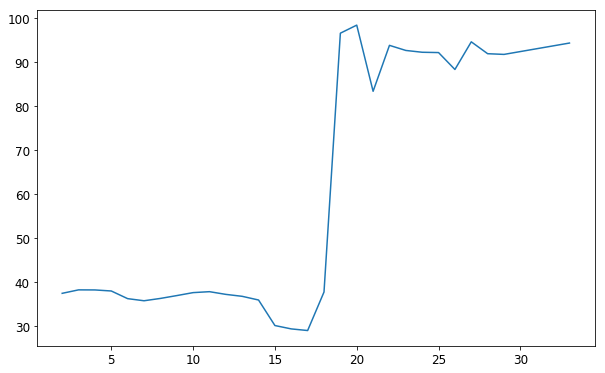

In [379]:
pre = "/Users/weilu/Research/server/apr_2018/01_week"
temp = 300
location = pre + "/ninth_freeEnergy_5_less_temp/_280-350/2d_z_qw/high_temp/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), block=[-15,-10,0.0,0.1], plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location3 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location3, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

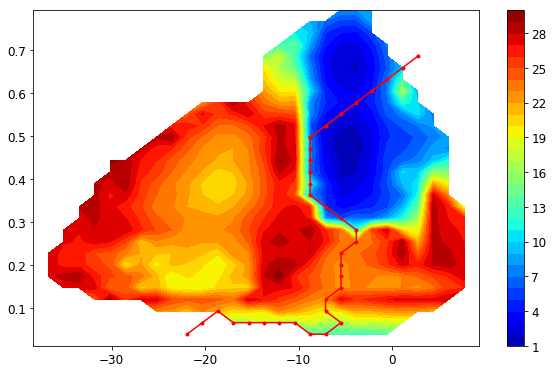

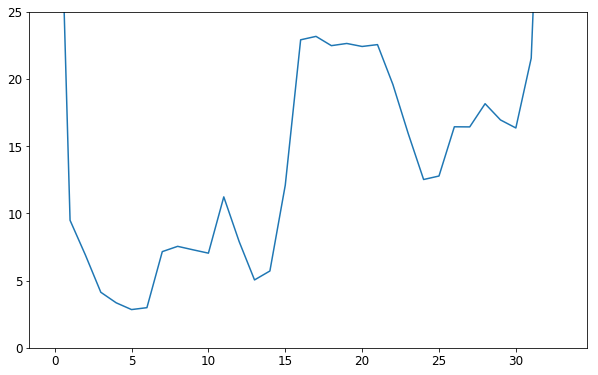

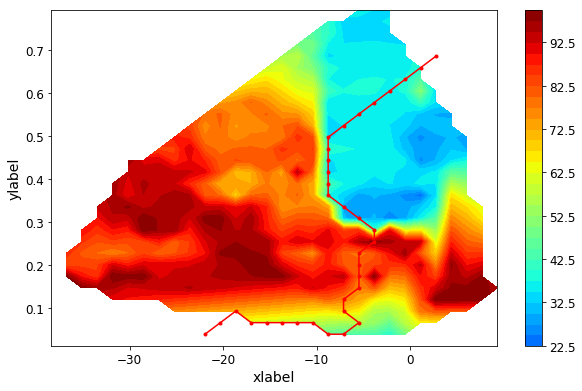

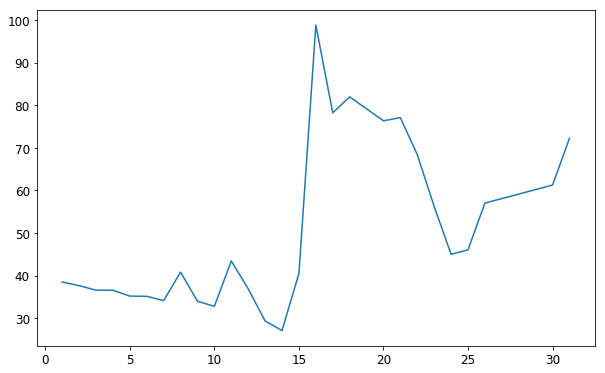

In [321]:
pre = "/Users/weilu/Research/server/apr_2018/01_week"
temp = 290
location = pre + "/ninth_freeEnergy_5_less_temp/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 10), block=[-20,-15,0.6,0.7], plot1d=True, save=False)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

In [ ]:
block = (0.6, )

In [173]:
np.searchsorted(xi, 20)

2

In [172]:
xi

array([ 16.497     ,  19.26941379,  22.04182759,  24.81424138,
        27.58665517,  30.35906897,  33.13148276,  35.90389655,
        38.67631034,  41.44872414,  44.22113793,  46.99355172,
        49.76596552,  52.53837931,  55.3107931 ,  58.0832069 ,
        60.85562069,  63.62803448,  66.40044828,  69.17286207,
        71.94527586,  74.71768966,  77.49010345,  80.26251724,
        83.03493103,  85.80734483,  88.57975862,  91.35217241,
        94.12458621,  96.897     ])

## Rerun 7

In [122]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/ninth/force_0.06_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_7_04_Apr_231330.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])

In [123]:
rerun7 = data
# data["BiasTo"] = data["BiasTo"].apply(pd.to_numeric)

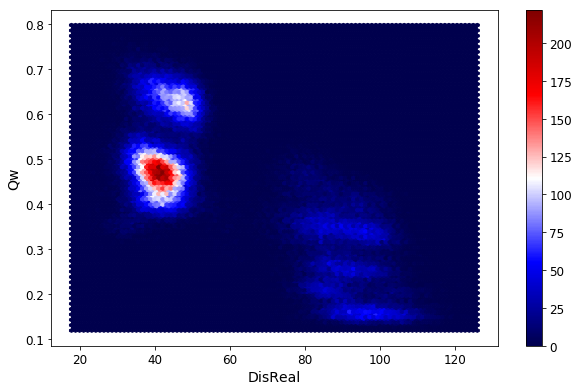

In [124]:
data.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [154]:
data.query("Temp == 300 and DisReal > 60").shape

(28983, 43)

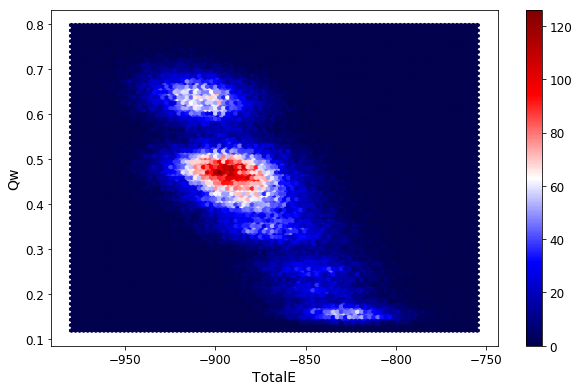

In [125]:
data.query("Temp == 300").plot.hexbin("TotalE", "Qw", cmap="seismic", sharex=False)

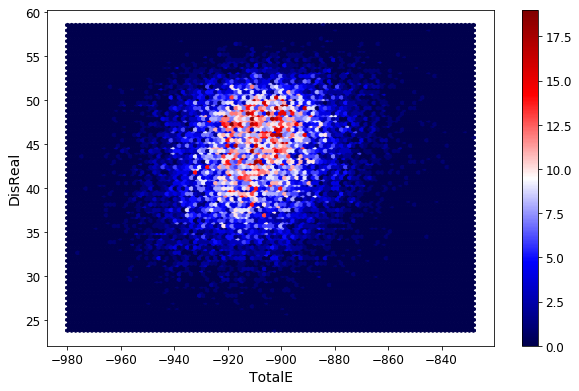

In [139]:
data.query("Temp == 300 and Qw > 0.6").plot.hexbin("TotalE", "DisReal", cmap="seismic", sharex=False)

-908.9993475062817

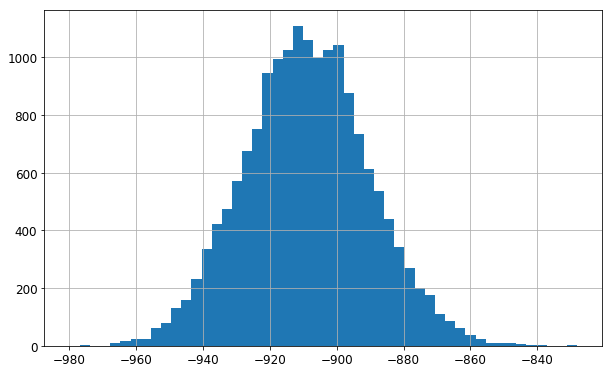

In [134]:
data.query("Temp == 300 and Qw > 0.6")["TotalE"].hist(bins=50)
data.query("Temp == 300 and Qw > 0.6")["TotalE"].mean()

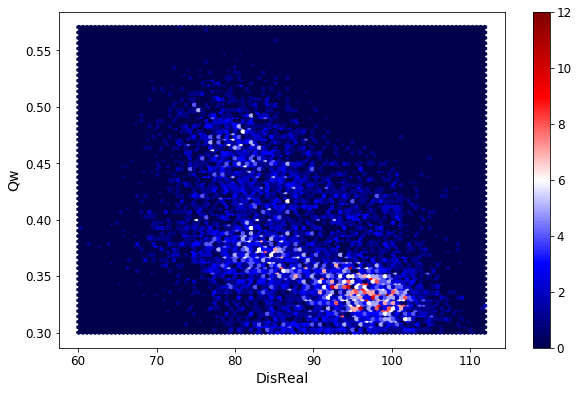

In [148]:
data.query("Temp == 300 and z_h6 < -10 and Qw > 0.3").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

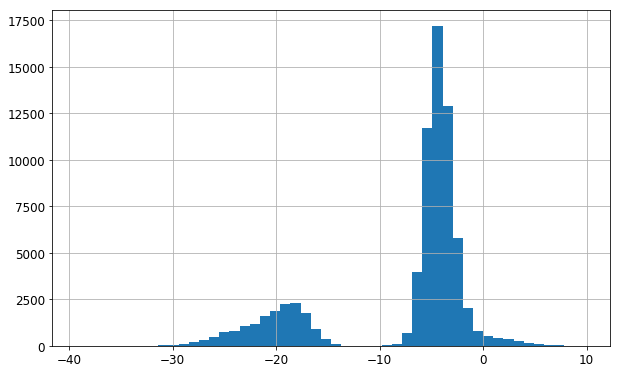

In [164]:
data.query("Temp == 300 and Qw < 0.6")["z_h6"].hist(bins=50)

-858.5170866171323


(7175, 43)

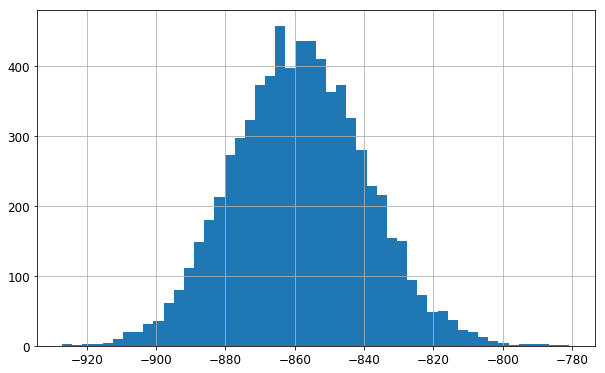

In [203]:
data.query("Temp == 300 and Qw > 0.3 and z_h6 < -10 and DisReal > 60")["TotalE"].hist(bins=50)
print(data.query("Temp == 300 and Qw > 0.3 and z_h6 < -10 and DisReal > 60")["TotalE"].mean())
data.query("Temp == 300 and Qw > 0.3 and z_h6 < -10 and DisReal > 60").shape

## Two part here, 
One with DisReal > 60

(6221, 43)


-875.0166693690952

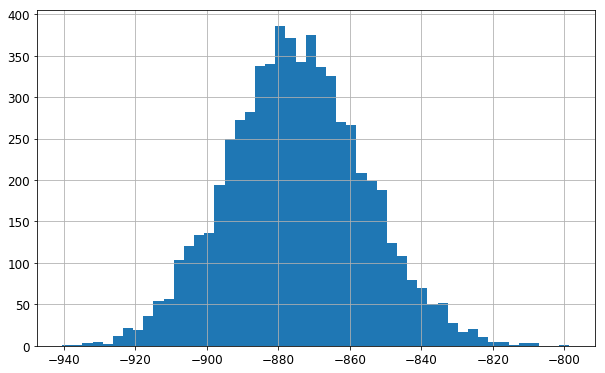

In [204]:
data.query("Temp == 300 and z_h6 > -10 and Qw > 0.3 and DisReal > 60")["TotalE"].hist(bins=50)
print(data.query("Temp == 300 and z_h6 > -10 and Qw > 0.3 and DisReal > 60").shape)
data.query("Temp == 300 and z_h6 > -10 and Qw > 0.3 and DisReal > 60")["TotalE"].mean()

In [195]:
t = data.query("Temp == 300 and z_h6 > -10 and Qw > 0.3 and DisReal > 60")
t.groupby(["BiasTo", "Run"])["Qw"].describe().query("count > 100")

count      mean       std       min       25%       50%       75%  \
BiasTo Run                                                                      
72.0   8    251.0  0.331380  0.016914  0.300520  0.318481  0.329844  0.343734   
74.0   8    115.0  0.350842  0.024570  0.300538  0.334939  0.349419  0.361610   
       11   184.0  0.352030  0.025777  0.300973  0.334212  0.350647  0.364934   
78.0   2    582.0  0.350725  0.021947  0.301000  0.335213  0.349560  0.365497   
80.0   1    383.0  0.347422  0.021195  0.303433  0.331633  0.346739  0.360955   
       7    478.0  0.349377  0.022634  0.300982  0.332810  0.347720  0.363692   
       8    382.0  0.346878  0.021583  0.300855  0.330785  0.346393  0.360646   
       9    396.0  0.349728  0.021193  0.301145  0.333405  0.349832  0.365705   
84.0   7    361.0  0.347062  0.020163  0.300202  0.332871  0.345651  0.360076   
88.0   1    489.0  0.387654  0.031921  0.300672  0.365318  0.389423  0.410119   
       10   459.0  0.399617  0.030593  0.318703  0.381806  0.400317  0.419547   
90.0   9    204.0  0.344613  0.020983  0.300634  0.329445  0.344976  0.358986   
       10   225.0  0.398894  0.027372  0.316385  0.383034  0.398304  0.415516   
92.0   8    471.0  0.372714  0.032957  0.302890  0.347729  0.370922  0.396583   
       11   198.0  0.341023  0.020253  0.304259  0.325441  0.339567  0.353536   
96.0   5    383.0  0.339173  0.020122  0.300796  0.324488  0.338162  0.350960   
       9    393.0  0.340088  0.019831  0.302228  0.325773  0.339094  0.352400   

                 max  
BiasTo Run            
72.0   8    0.402180  
74.0   8    0.435940  
       11   0.442350  
78.0   2    0.418287  
80.0   1    0.411149  
       7    0.418313  
       8    0.421669  
       9    0.411630  
84.0   7    0.416170  
88.0   1    0.472375  
       10   0.487651  
90.0   9    0.404646  
       10   0.468483  
92.0   8    0.470442  
       11   0.428579  
96.0   5    0.411800  
       9    0.399826

## DisReal < 60

-896.6218664373583

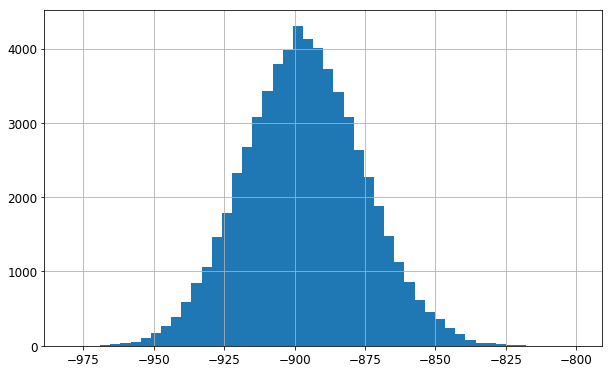

In [190]:
data.query("Temp == 300 and z_h6 > -10 and Qw < 0.6 and DisReal < 60")["TotalE"].hist(bins=50)
data.query("Temp == 300 and z_h6 > -10 and Qw < 0.6 and DisReal < 60")["TotalE"].mean()

In [206]:
t = data.query("Temp == 300 and z_h6 > -10 and Qw < 0.6 and DisReal < 60")
t.groupby(["BiasTo", "Run"])["TotalE"].describe().query("count > 100")

count        mean        std         min         25%         50%  \
BiasTo Run                                                                     
30.0   0    394.0 -890.251209  19.283854 -947.544810 -904.379298 -888.767989   
       3    620.0 -901.879032  18.444902 -961.730918 -914.355321 -901.868031   
       5    114.0 -889.103539  17.625567 -935.345576 -901.511543 -888.432567   
       7    332.0 -885.430943  17.821426 -932.626242 -897.484021 -885.885062   
       8    588.0 -899.772309  18.880098 -957.719562 -912.416068 -900.452462   
32.0   3    632.0 -899.654913  18.584577 -951.211078 -912.247703 -899.309120   
       6    194.0 -883.791805  17.641747 -927.904285 -896.698596 -883.547391   
       9    558.0 -901.007225  19.587102 -947.474355 -913.153758 -901.538200   
       10   157.0 -887.753531  19.533920 -945.888816 -900.551720 -887.865169   
34.0   0    303.0 -901.857320  18.758789 -956.152877 -914.247053 -900.549990   
       5    206.0 -881.787809  17.559785 -935.028185 -893.783233 -884.337537   
       6    499.0 -886.639411  19.204203 -956.004474 -898.319677 -886.362851   
       8    439.0 -886.771852  18.936983 -935.404168 -900.759851 -888.298555   
       9    166.0 -875.682184  18.760039 -920.377910 -887.859687 -874.233890   
       10   468.0 -889.802760  19.740321 -940.281849 -903.157731 -890.244557   
       11   390.0 -889.543798  20.667989 -945.690371 -902.701796 -889.173510   
36.0   6    745.0 -898.672030  17.722600 -944.592028 -911.162059 -899.124975   
       9    178.0 -887.958891  19.361262 -933.458611 -901.874268 -887.386495   
       10   751.0 -899.442786  18.264277 -948.574290 -911.876551 -899.434582   
38.0   0    190.0 -887.070169  19.997046 -932.513527 -899.400700 -887.331952   
       1    803.0 -897.982131  18.899288 -948.417071 -910.692875 -898.353706   
       2    292.0 -884.828799  18.548164 -929.632641 -895.771273 -886.483368   
       3    284.0 -888.637338  17.777921 -935.713625 -900.609155 -888.930495   
       9    202.0 -888.994218  18.454132 -940.793974 -900.077167 -890.945484   
40.0   0    332.0 -881.066871  18.798838 -931.016997 -894.962503 -880.563670   
       1    421.0 -884.327925  18.959000 -934.258436 -897.606460 -886.138082   
       2    433.0 -886.459083  18.767784 -937.516092 -899.308611 -886.358190   
       3    415.0 -886.970365  19.547075 -932.519441 -900.623635 -888.358786   
       6    266.0 -874.557970  18.951226 -920.341500 -886.050496 -874.460368   
       8    303.0 -885.330511  17.744929 -934.041834 -897.705181 -884.941002   
...           ...         ...        ...         ...         ...         ...   
66.0   0    121.0 -901.122000  18.884814 -950.234870 -914.512399 -900.147314   
       1    116.0 -895.673453  20.593193 -943.158672 -909.286231 -892.700447   
       2    122.0 -893.386943  16.639179 -940.563389 -903.356458 -890.835211   
       5    146.0 -892.489449  18.084460 -939.473970 -903.558047 -892.728915   
       9    113.0 -900.106981  19.429993 -947.721683 -913.266159 -901.885025   
68.0   2    114.0 -900.485431  18.094734 -955.734272 -911.996865 -900.974327   
       4    117.0 -899.122680  18.390827 -937.082189 -912.868173 -897.244308   
       5    122.0 -899.202206  18.096502 -942.277956 -912.256825 -899.429781   
       6    108.0 -899.350525  19.895123 -948.184033 -912.749381 -900.136850   
70.0   0    128.0 -894.078248  19.151928 -932.680240 -906.530740 -893.622555   
       1    116.0 -892.546498  19.361662 -941.066566 -905.893757 -890.558962   
       2    102.0 -886.921617  19.749254 -931.882107 -899.941331 -886.186594   
       4    117.0 -900.586853  15.987925 -931.885593 -911.162284 -900.690096   
       6    151.0 -897.635438  19.035434 -948.544722 -910.327936 -898.369543   
       9    144.0 -899.479657  18.821801 -961.859476 -910.614437 -899.454667   
       11   129.0 -896.937018  18.231441 -931.164155 -912.345856 -898.066799   
72.0   5    843.0 -889.735359  18.385546 -945.165975 -901.767226 -889.610041   
       7    

In [205]:
t = data.query("Temp == 300 and z_h6 > -10 and Qw < 0.6 and DisReal < 60")
t.groupby(["BiasTo", "Run"])["Qw"].describe().query("count > 100")

count      mean       std       min       25%       50%       75%  \
BiasTo Run                                                                      
30.0   0    394.0  0.489531  0.043844  0.358303  0.461404  0.492923  0.520311   
       3    620.0  0.485340  0.029477  0.408019  0.466635  0.484666  0.505224   
       5    114.0  0.444789  0.047450  0.344071  0.408037  0.429610  0.479605   
       7    332.0  0.524273  0.028805  0.454118  0.505165  0.523628  0.544429   
       8    588.0  0.488453  0.031958  0.389779  0.464817  0.488286  0.510258   
32.0   3    632.0  0.487750  0.030249  0.410464  0.467053  0.487285  0.507899   
       6    194.0  0.521501  0.028685  0.441429  0.500648  0.521954  0.539422   
       9    558.0  0.486652  0.027890  0.405111  0.468676  0.486566  0.504700   
       10   157.0  0.522495  0.031685  0.437480  0.504383  0.519569  0.541603   
34.0   0    303.0  0.488812  0.028451  0.418062  0.468822  0.487874  0.509373   
       5    206.0  0.443994  0.035986  0.322582  0.427907  0.446196  0.465365   
       6    499.0  0.522046  0.029040  0.428436  0.503733  0.523642  0.541547   
       8    439.0  0.524791  0.029219  0.430359  0.505522  0.526952  0.545704   
       9    166.0  0.496579  0.026986  0.408038  0.480445  0.496830  0.514039   
       10   468.0  0.413349  0.022430  0.344875  0.399962  0.413567  0.427569   
       11   390.0  0.410743  0.022368  0.350805  0.396504  0.408812  0.424746   
36.0   6    745.0  0.483690  0.030461  0.394670  0.463188  0.482566  0.503314   
       9    178.0  0.414196  0.020174  0.364020  0.401110  0.413120  0.428199   
       10   751.0  0.484260  0.030414  0.404256  0.463737  0.483324  0.504644   
38.0   0    190.0  0.408572  0.024124  0.338022  0.391332  0.406393  0.424663   
       1    803.0  0.481138  0.030067  0.398346  0.460458  0.480804  0.501786   
       2    292.0  0.520303  0.028539  0.445324  0.500611  0.520745  0.542394   
       3    284.0  0.423729  0.041731  0.363189  0.396241  0.413268  0.431222   
       9    202.0  0.415782  0.022594  0.363667  0.400491  0.415146  0.429986   
40.0   0    332.0  0.442155  0.023612  0.370792  0.426444  0.444496  0.456481   
       1    421.0  0.518245  0.030308  0.421739  0.499133  0.519452  0.538511   
       2    433.0  0.407968  0.022324  0.351707  0.392262  0.407573  0.422140   
       3    415.0  0.411648  0.021136  0.323997  0.398344  0.410570  0.425364   
       6    266.0  0.351914  0.017503  0.300588  0.341483  0.352147  0.361913   
       8    303.0  0.443511  0.021982  0.363102  0.428339  0.443220  0.459870   
...           ...       ...       ...       ...       ...       ...       ...   
66.0   0    121.0  0.575636  0.017451  0.524251  0.560832  0.577432  0.591042   
       1    116.0  0.577491  0.021303  0.495074  0.569036  0.584397  0.592174   
       2    122.0  0.467920  0.031502  0.386007  0.445745  0.470909  0.490302   
       5    146.0  0.467205  0.025945  0.404986  0.451272  0.465407  0.485017   
       9    113.0  0.579406  0.016709  0.511979  0.570995  0.583537  0.590994   
68.0   2    114.0  0.576348  0.019013  0.507565  0.564166  0.581423  0.591033   
       4    117.0  0.580757  0.017576  0.521178  0.572045  0.586170  0.594763   
       5    122.0  0.574987  0.018805  0.529303  0.564137  0.578293  0.591018   
       6    108.0  0.580065  0.015938  0.539403  0.571373  0.582882  0.592905   
70.0   0    128.0  0.462869  0.026190  0.395824  0.447547  0.460828  0.479186   
       1    116.0  0.466758  0.026348  0.388508  0.450535  0.467621  0.483546   
       2    102.0  0.464029  0.027526  0.391007  0.447468  0.463903  0.481800   
       4    117.0  0.575161  0.021442  0.482658  0.565996  0.579825  0.591280   
       6    151.0  0.577447  0.017979  0.519017  0.565755  0.581196  0.592861   
       9    144.0  0.576912  0.019614  0.518649  0.567711  0.582269  0.592874   
       11   129.0  0.580298  0.017659  0.505153  0.572408  0.586535  0.592519   
72.0   5    843.0  0.464094  0.025547  0.38

0.5200406120854402

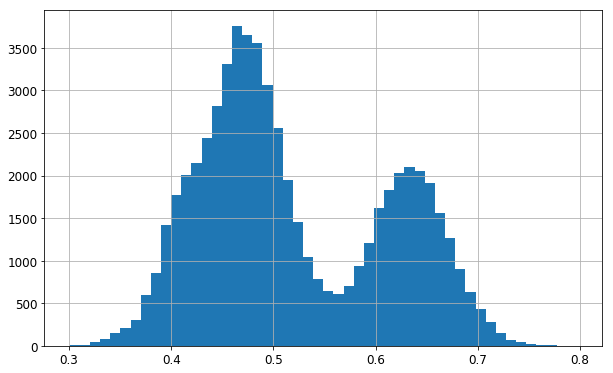

In [197]:
data.query("Temp == 300 and z_h6 > -10 and Qw > 0.3 and DisReal < 60")["Qw"].hist(bins=50)
data.query("Temp == 300 and z_h6 > -10 and Qw > 0.3 and DisReal < 60")["Qw"].mean()

In [ ]:
t = data.query("Temp == 300 and z_h6 < -10 and Qw > 0.3")
t.groupby(["BiasTo", "Run"])["Qw"].describe().query("count > 100")

In [149]:
t = data.query("Temp == 300 and z_h6 < -10 and Qw > 0.3")
t.groupby(["BiasTo", "Run"])["Qw"].describe().query("count > 100")

count      mean       std       min       25%       50%       75%  \
BiasTo Run                                                                      
100.0  10   156.0  0.401507  0.029608  0.315298  0.384423  0.401515  0.419898   
72.0   1    256.0  0.377285  0.022454  0.301294  0.363600  0.377906  0.393576   
78.0   7    164.0  0.449923  0.035584  0.345792  0.427605  0.446752  0.475710   
80.0   0    162.0  0.446442  0.032028  0.354827  0.430338  0.449124  0.465840   
       5    229.0  0.448336  0.035905  0.327640  0.422755  0.448652  0.473249   
       11   358.0  0.460356  0.033694  0.369025  0.437515  0.459280  0.483573   
82.0   2    107.0  0.450985  0.039338  0.364041  0.420962  0.451839  0.477923   
84.0   8    734.0  0.367220  0.022367  0.306020  0.351989  0.367830  0.383073   
86.0   6    189.0  0.359501  0.025159  0.310352  0.342112  0.359164  0.375743   
88.0   2    316.0  0.357779  0.024044  0.301202  0.341398  0.357336  0.373844   
       4    507.0  0.445021  0.036512  0.335681  0.419464  0.446287  0.471036   
       5    481.0  0.443088  0.034372  0.339516  0.420437  0.440849  0.468509   
       8    191.0  0.362609  0.022720  0.307835  0.348507  0.363370  0.380009   
92.0   7    181.0  0.318419  0.017204  0.300058  0.305806  0.313089  0.327235   
       10   113.0  0.378277  0.052080  0.300115  0.332064  0.378333  0.423989   
96.0   3    109.0  0.313523  0.010522  0.300059  0.305449  0.312272  0.319603   
       7    854.0  0.334134  0.017192  0.300080  0.321745  0.333039  0.345030   
98.0   1    488.0  0.334744  0.019960  0.300052  0.320059  0.333613  0.347594   
       6    574.0  0.337025  0.019014  0.300169  0.324376  0.335988  0.349475   
       7    423.0  0.400406  0.031782  0.312027  0.377341  0.402923  0.421179   
       9    311.0  0.338310  0.021854  0.300088  0.320835  0.335578  0.354701   

                 max  
BiasTo Run            
100.0  10   0.469629  
72.0   1    0.439035  
78.0   7    0.532827  
80.0   0    0.529778  
       5    0.536800  
       11   0.570592  
82.0   2    0.568188  
84.0   8    0.427086  
86.0   6    0.425219  
88.0   2    0.431721  
       4    0.558018  
       5    0.547236  
       8    0.418722  
92.0   7    0.380311  
       10   0.472322  
96.0   3    0.346076  
       7    0.404080  
98.0   1    0.409914  
       6    0.407215  
       7    0.500205  
       9    0.404305

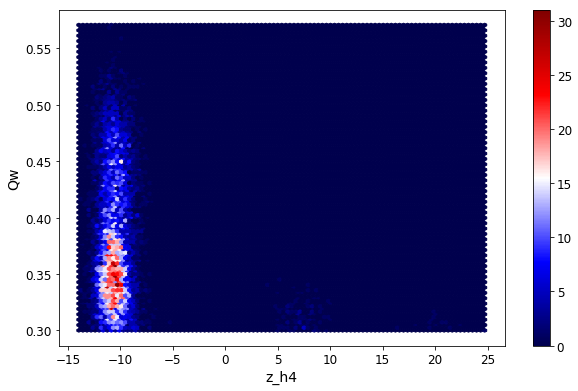

In [145]:
data.query("Temp == 300 and z_h6 < -10 and Qw > 0.3").plot.hexbin("z_h4", "Qw", cmap="seismic", sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21e912e8>]], dtype=object)

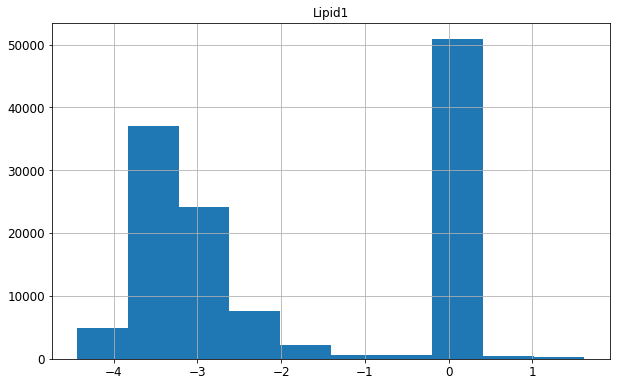

In [6]:
t = data.query("Temp < 350 and DisReal > 60 and Qw > 0.18")
t.hist("Lipid1")

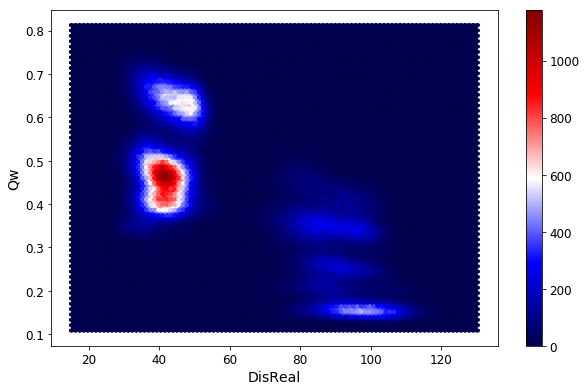

In [9]:
data.query("Temp < 350").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [20]:
rerun7.query("Temp < 350")["Step"].count()

540000

In [17]:
t = rerun5.query("Temp < 350 and DisReal > 60 and Qw > 0.18 and Lipid1 > -1")
t["Step"].count()

53939

In [18]:
t = rerun7.query("Temp < 350 and DisReal > 60 and Qw > 0.18 and Lipid1 > -1")
t["Step"].count()

52305

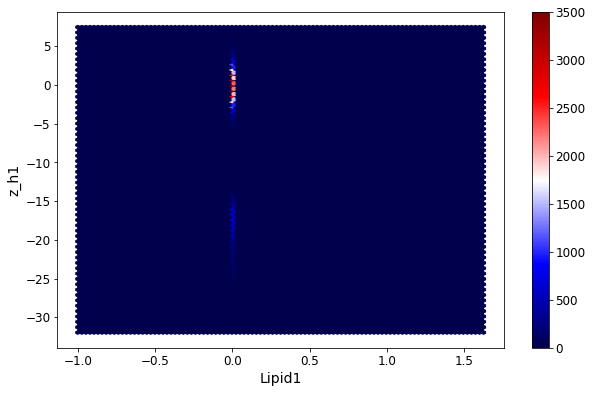

In [10]:
t = data.query("Temp < 350 and DisReal > 60 and Qw > 0.18 and Lipid1 > -1")
t.plot.hexbin("Lipid1", "z_h1", cmap="seismic", sharex=False)

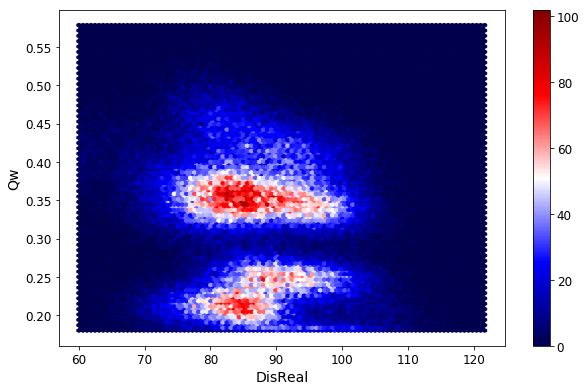

In [283]:
data.query("Temp < 350 and DisReal > 60 and Qw > 0.18").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [277]:
data.query("Qw > 0.58").groupby("Temp")["DisReal"].describe()

count       mean       std        min        25%        50%  \
Temp                                                                  
280   34395.0  42.940793  5.531507  24.547152  38.811300  42.836657   
290   22489.0  42.784274  5.330718  21.744802  38.877496  42.851639   
300   11801.0  43.579822  5.151529  25.652358  39.889707  44.021430   
310    5845.0  44.908710  4.777508  27.114228  41.968282  45.678484   
320    2639.0  45.515907  4.648256  26.487897  42.868365  46.234237   
335     574.0  45.595006  4.176323  31.826684  42.863389  46.208786   
350      82.0  45.239074  4.337481  32.754204  42.069960  46.152603   
365       5.0  46.504712  3.444580  41.733659  45.157007  46.514402   

            75%        max  
Temp                        
280   47.382027  59.594937  
290   46.927034  57.014944  
300   47.580846  58.152470  
310   48.428579  55.947778  
320   48.820234  56.778925  
335   48.586064  54.507667  
350   48.677832  52.897284  
365   48.106523  51.011969

In [220]:
t = data.query("z_h6 < -20 and Qw > 0.25 and Qw < 0.35 and DisReal > 60")
t.groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 100")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                
60.0   5    113.0  66.512154  3.886832  60.147610  63.580878  66.285957   
68.0   11   180.0  73.756180  6.057438  60.749281  69.398390  73.617739   
70.0   0    469.0  74.191685  5.318893  60.414137  70.405310  74.056265   
74.0   2    101.0  76.827775  5.457357  66.320898  72.989188  76.996523   
       11   144.0  75.486415  4.963238  62.432900  71.845102  74.953984   
76.0   3    235.0  78.447992  5.253855  66.259977  74.608759  78.511404   
80.0   5    217.0  79.799922  4.855510  67.250980  76.633111  80.259033   
       11   198.0  79.955361  5.238624  65.716158  76.483398  80.330906   
82.0   3    114.0  82.243958  3.904281  72.643975  79.513151  81.941932   
84.0   6    416.0  85.558974  4.732438  70.555359  82.467007  85.292550   
       8    415.0  86.876651  6.218563  70.161543  82.480690  87.035292   
86.0   6    199.0  91.192025  5.494117  75.331115  88.039038  91.072395   
88.0   2    262.0  90.216668  5.130045  75.261177  86.876216  90.352033   
       5    351.0  87.891460  5.725054  73.764376  83.802720  87.646519   
92.0   2    542.0  89.927684  5.273472  70.467923  86.323840  89.760363   
94.0   1    106.0  90.242444  6.574085  77.091854  84.989310  90.004269   
96.0   7    812.0  96.576466  5.142513  79.397742  93.199597  96.335172   
98.0   1    818.0  97.598809  4.302016  86.262144  94.911896  97.646100   
       6    441.0  97.337894  5.101396  81.527405  94.271081  97.383584   

                   75%         max  
BiasTo Run                          
60.0   5     69.405557   77.179416  
68.0   11    77.737753   92.431294  
70.0   0     78.122878   89.513138  
74.0   2     80.230168   89.134214  
       11    79.007245   87.323786  
76.0   3     81.494020   95.362849  
80.0   5     83.007123   96.753831  
       11    83.365813   93.809286  
82.0   3     85.159661   91.372623  
84.0   6     88.945509   98.381981  
       8     91.161424  104.109995  
86.0   6     94.250562  106.096975  
88.0   2     93.509445  104.125687  
       5     91.993305  105.204918  
92.0   2     93.542206  105.406497  
94.0   1     95.004842  106.691579  
96.0   7    100.062148  110.993673  
98.0   1    100.322980  112.100967  
       6    100.831160  109.210235

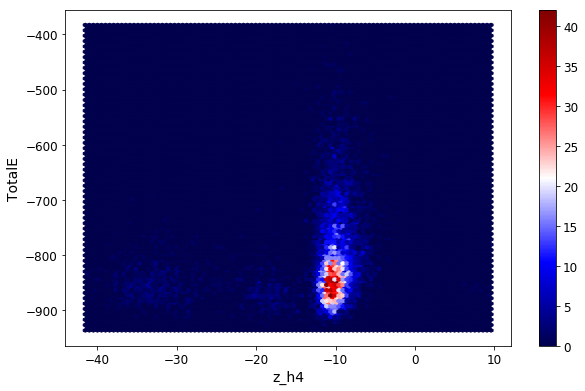

In [216]:
data.query("z_h6 < -20 and Qw > 0.25 and Qw < 0.35 and DisReal > 60").plot.hexbin("z_h4", "TotalE", cmap="seismic", sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4a99ada0>]], dtype=object)

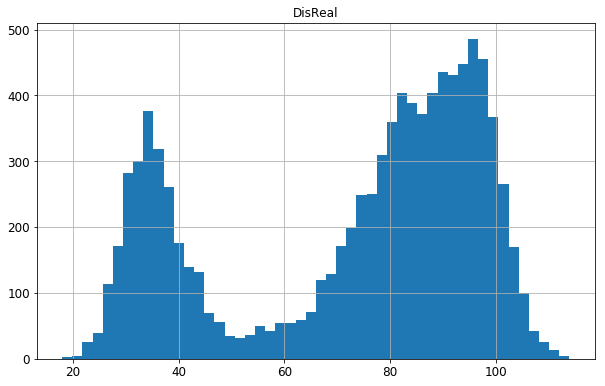

In [196]:
data.query("z_h6 < -20 and Qw > 0.25 and Qw < 0.35").hist("DisReal", bins=50)

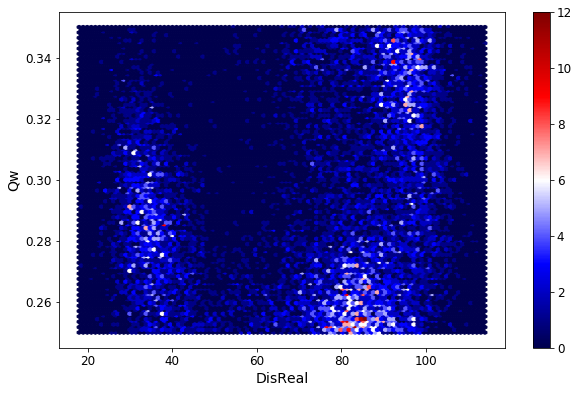

In [193]:
data.query("z_h6 < -20 and Qw > 0.25 and Qw < 0.35").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

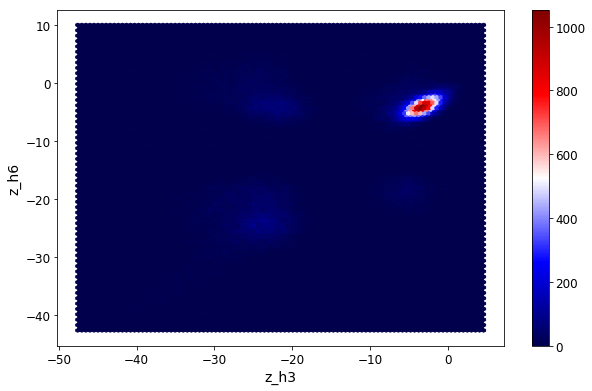

In [40]:
data.query("Temp == 300").plot.hexbin("z_h3", "z_h6", cmap="seismic", sharex=False)

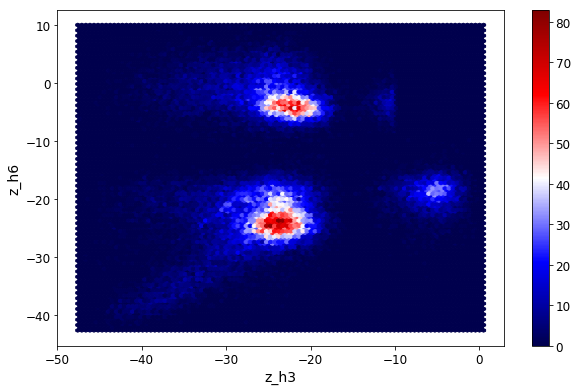

In [42]:
a = data.query("(z_h3 < -10) or (z_h6 < -10)")
a.query("Temp == 300").plot.hexbin("z_h3", "z_h6", cmap="seismic", sharex=False)

In [66]:
data.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'z_average',
       'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2', 'rg3', 'rg4',
       'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2', 'Lipid3', 'Lipid4',
       'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10', 'Lipid11',
       'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'TotalE', 'BiasTo'],
      dtype='object')

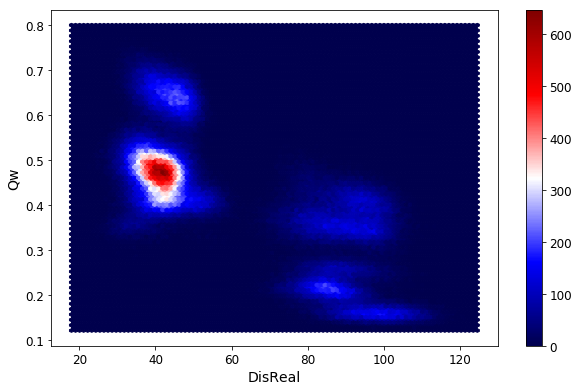

In [88]:
data.query("Temp <= 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

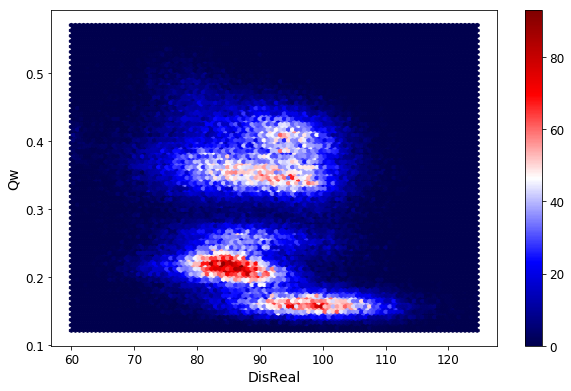

In [87]:
data.query("Temp <= 300 and DisReal > 60").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [91]:
data.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'z_average',
       'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2', 'rg3', 'rg4',
       'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2', 'Lipid3', 'Lipid4',
       'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10', 'Lipid11',
       'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'TotalE', 'BiasTo'],
      dtype='object')

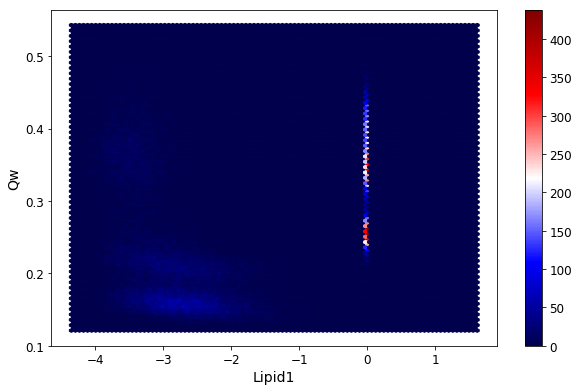

In [94]:
data.query("Temp == 300 and DisReal > 60").plot.hexbin("Lipid1", "Qw", cmap="seismic", sharex=False)

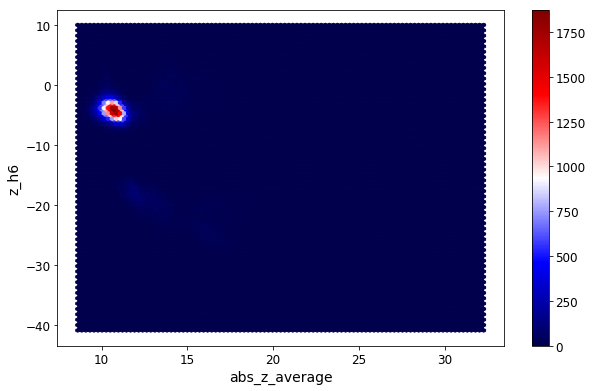

In [96]:
data.query("Temp == 300").plot.hexbin("abs_z_average", "z_h6", cmap="seismic", sharex=False)

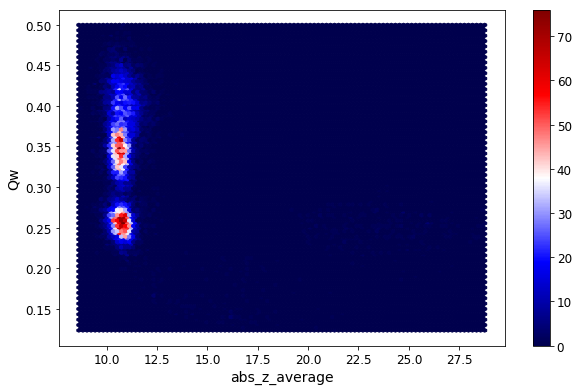

In [126]:
data.query("Temp == 300 and Qw < 0.6 and DisReal > 60 and Lipid1 > -1").plot.hexbin("abs_z_average", "Qw", cmap="seismic", sharex=False)

In [130]:
data.query("Temp == 300 and Qw < 0.6 and DisReal > 60").shape

(35124, 43)

In [129]:
t = data.query("Temp == 300 and Qw < 0.6 and DisReal > 60 and Lipid1 > -1")
print(t.shape)
t.groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 500")

(11439, 43)


count       mean       std        min        25%        50%  \
BiasTo Run                                                                
72.0   8    538.0  77.631154  4.978481  64.034331  74.265102  77.679578   
74.0   5    671.0  79.352226  4.992393  64.103251  75.905704  79.439485   
       8    597.0  80.370943  4.771834  63.743749  77.312220  80.329319   
76.0   2    609.0  82.491103  4.934288  66.209328  79.096101  82.395038   
80.0   7    570.0  84.330678  4.942327  65.585395  81.343990  84.503898   
       8    583.0  84.765906  4.744009  71.252220  81.699702  84.902951   
82.0   7    591.0  86.381836  4.886817  74.129515  82.791748  86.400281   
       9    515.0  86.697468  4.841471  71.817455  83.436906  86.703616   
88.0   1    503.0  91.928638  4.759968  75.885403  88.872399  91.672946   
90.0   11   817.0  92.899936  4.619934  79.678197  89.964819  92.984239   
98.0   10   540.0  98.684912  4.785347  85.058600  95.322567  98.759484   

                   75%         max  
BiasTo Run                          
72.0   8     81.148599   92.402795  
74.0   5     82.716725   94.980508  
       8     83.590274   94.733364  
76.0   2     85.988688   95.370163  
80.0   7     87.671476   98.049908  
       8     87.689288   99.617263  
82.0   7     89.636735  101.037585  
       9     90.212749  101.873019  
88.0   1     95.171128  105.171102  
90.0   11    95.992677  107.310590  
98.0   10   102.196297  111.325873

In [128]:
t = data.query("Temp == 300 and Qw < 0.6 and DisReal > 60 and z_h6 < -10")
print(t.shape)
t.groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 500")

(15583, 43)


count       mean       std        min        25%        50%  \
BiasTo Run                                                                
100.0  11   544.0  84.293570  3.425672  75.519237  81.961637  84.397217   
72.0   5    548.0  73.933853  4.387406  61.049616  71.126700  74.101592   
       6    570.0  77.566640  4.805078  63.593634  74.509323  77.478254   
78.0   5    520.0  82.549008  4.721425  70.541042  79.102200  82.721582   
       10   540.0  82.675814  4.635266  68.840841  79.520502  82.781726   
80.0   0    568.0  79.695028  4.399605  67.366476  76.710162  79.807395   
84.0   8    530.0  83.894069  5.306648  70.917908  80.118754  83.161541   
       11   553.0  86.657368  4.707773  73.011489  83.747428  86.888678   
86.0   11   531.0  87.787863  4.444919  76.416774  84.737965  87.608177   
88.0   2    595.0  84.620395  4.761268  70.773094  81.346685  84.557121   
92.0   2    564.0  91.000057  5.468401  78.150078  87.060316  90.448845   
96.0   7    963.0  95.072311  5.525327  77.822069  91.490362  94.993429   

                  75%         max  
BiasTo Run                         
100.0  11   86.622628   94.611569  
72.0   5    77.014725   86.079380  
       6    80.691643   92.106523  
78.0   5    85.779293   95.670568  
       10   85.958293   96.702022  
80.0   0    82.590351   96.141058  
84.0   8    87.110482  100.301417  
       11   89.551823  100.057218  
86.0   11   90.635270  102.053831  
88.0   2    87.582304   98.051481  
92.0   2    94.965484  108.250962  
96.0   7    98.830402  110.993673

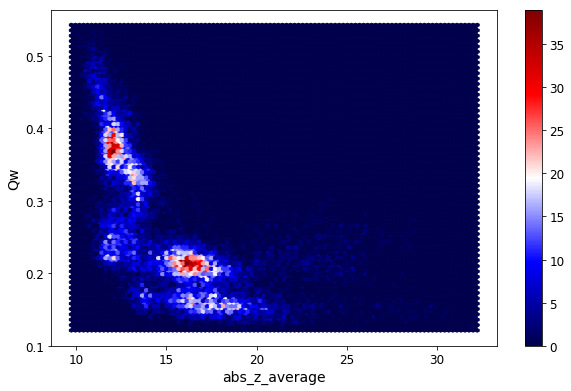

In [125]:
data.query("Temp == 300 and Qw < 0.6 and DisReal > 60 and z_h6 < -10").plot.hexbin("abs_z_average", "Qw", cmap="seismic", sharex=False)

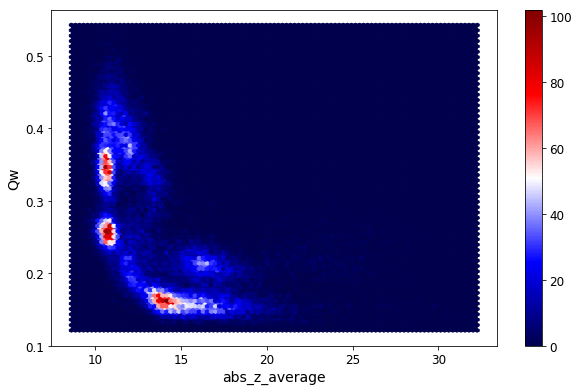

In [124]:
data.query("Temp == 300 and Qw < 0.6 and DisReal > 60").plot.hexbin("abs_z_average", "Qw", cmap="seismic", sharex=False)

In [120]:
t = data.query("Temp == 300 and Qw < 0.6 and Lipid1 < -1 and DisReal < 60")
t.groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 500")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                
30.0   11   501.0  34.550022  3.497956  24.170195  32.341842  34.733842   
32.0   8    523.0  35.867688  3.378665  24.100050  33.797883  35.808496   
       10   645.0  36.086853  2.985883  26.805858  34.255239  35.990810   
34.0   6    514.0  32.001355  3.933645  19.487454  29.375800  32.185595   
36.0   6    683.0  36.538337  3.075776  26.712718  34.600427  36.581137   
       9    535.0  37.053009  3.487852  27.163052  34.778089  36.952146   
       10   599.0  36.493984  3.050589  28.673133  34.313042  36.475634   
38.0   0    542.0  38.292865  3.117689  29.507186  36.509181  38.429570   
       1    714.0  37.156266  3.051513  27.119173  35.145635  37.288075   
       2    646.0  38.042212  2.957526  29.438891  36.105246  37.955290   
42.0   6    707.0  38.366364  2.976499  28.001329  36.458438  38.554256   
       9    636.0  38.318101  2.830133  30.080318  36.520623  38.279709   
44.0   7    653.0  39.187825  2.832088  31.375651  37.427158  39.179752   
46.0   5    582.0  39.461132  2.802785  29.656917  37.685658  39.756264   
       9    592.0  39.515688  2.656214  31.390946  37.743350  39.514984   
48.0   2    532.0  39.997772  2.763595  32.714515  38.160923  40.078110   
       5    617.0  40.078830  2.917347  30.190290  38.052028  40.208077   
50.0   4    572.0  40.516251  2.894581  29.218862  38.590035  40.625680   
       6    579.0  40.452561  2.723055  31.306359  38.851076  40.420034   
52.0   6    585.0  42.891324  3.309122  34.838188  40.494285  42.791672   
54.0   3    593.0  43.652043  3.418296  34.941781  41.392058  43.590167   
       8    504.0  43.468905  3.307635  33.128995  41.161186  43.479570   
56.0   1    557.0  44.201995  3.411782  33.753458  41.816051  44.090526   
       7    542.0  44.164520  3.429523  32.235866  41.796897  44.247860   
58.0   7    824.0  42.481098  2.637412  33.582897  40.764434  42.498365   
60.0   8    608.0  42.638195  2.560345  34.202688  40.911645  42.578285   
       10   543.0  42.848207  2.621652  34.645227  41.066412  42.700465   
62.0   0    597.0  43.277374  2.653459  32.995607  41.460755  43.142450   
       7    634.0  43.225784  2.627363  35.509930  41.493669  43.174808   
       9    684.0  43.219135  2.749727  34.961009  41.375080  43.101129   
64.0   7    666.0  47.337949  2.991526  37.048099  45.439008  47.615525   
       10   588.0  46.540005  3.096186  38.317320  44.321463  46.640451   
68.0   4    590.0  44.379569  2.656873  36.506250  42.625571  44.344091   
70.0   1    678.0  45.143000  2.616832  36.997997  43.303478  45.142127   
       11   679.0  45.274321  2.628822  36.256916  43.455996  45.276506   
74.0   1    549.0  50.903293  3.274476  40.958378  48.939727  50.828384   
76.0   0    522.0  51.331612  3.403327  42.337286  49.037508  51.416541   
       4    526.0  51.618093  3.490510  40.795565  49.258330  51.623358   

                  75%        max  
BiasTo Run                        
30.0   11   36.927544  44.118947  
32.0   8    38.302579  45.959715  
       10   38.118236  47.008506  
34.0   6    34.763219  43.226268  
36.0   6    38.632251  45.696680  
       9    39.300564  46.858792  
       10   38.632653  45.187989  
38.0   0    40.372452  47.251375  
       1    39.339564  46.587213  
       2    40.029292  47.525100  
42.0   6    40.285623  47.530492  
       9    40.229305  45.076937  
44.0   7    41.124606  47.085678  
46.0   5    41.339765  46.331141  
       9    41.435002  46.551716  
48.0   2    41.975311  47.424742  
       5    42.158398  49.065847  
50.0   4    42.319545  49.911833  
       6    42.158544  47.852737  
52.0   6    45.103617  53.407546  
54.0   3    45.989911  55.849975  
       8    45.611239  52.045254  
56.0   1    46.363673  54.841648  
       7    46.500655  55.349855  
58.0   7    44.173776  50.799169  
60.0   8    44.345535  49.555813  
       10   44.606472  51.47916

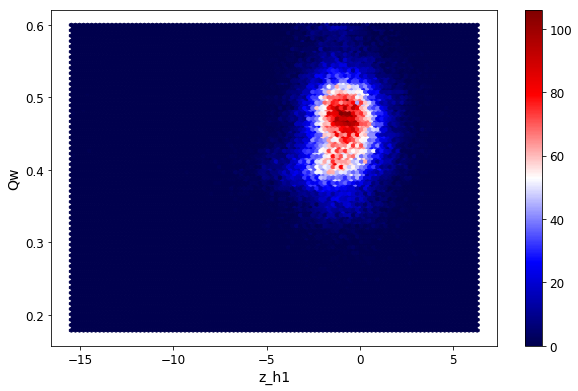

In [114]:
data.query("Temp == 300 and Qw < 0.6 and Lipid1 < -1 and DisReal < 60").plot.hexbin("z_h1", "Qw", cmap="seismic", sharex=False)

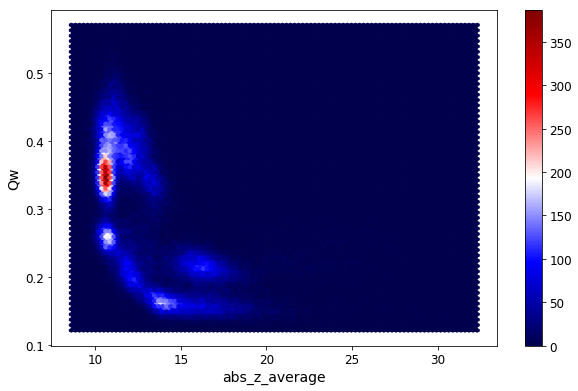

In [85]:
data.query("Temp <= 300 and DisReal > 60").plot.hexbin("abs_z_average", "Qw", cmap="seismic", sharex=False)

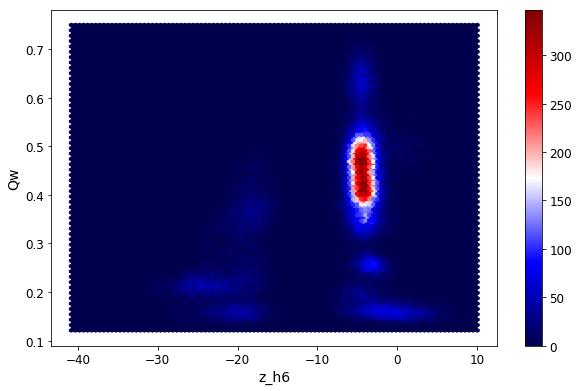

In [64]:
data.query("Temp == 300").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [34]:
a = data.query("(z_h6 > -10 and z_h1 < -10) or (z_h6 < -10 and z_h1 > -10)")

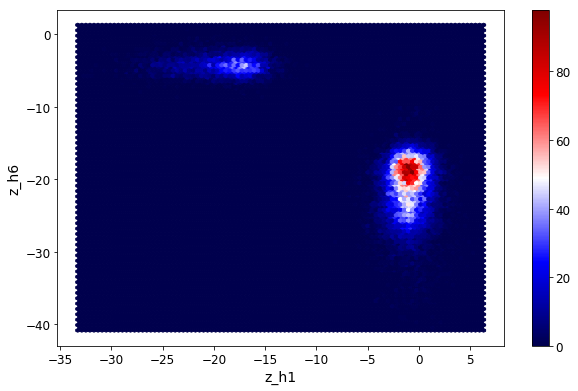

In [35]:
a.query("Temp == 300").plot.hexbin("z_h1", "z_h6", cmap="seismic", sharex=False)

## I hope we don't see this, for rerun 3.
(h6 inside, h1 outside)

In [59]:
rerun1.query("Temp <= 300 and z_h1 < -10")["DisReal"].count()

23027

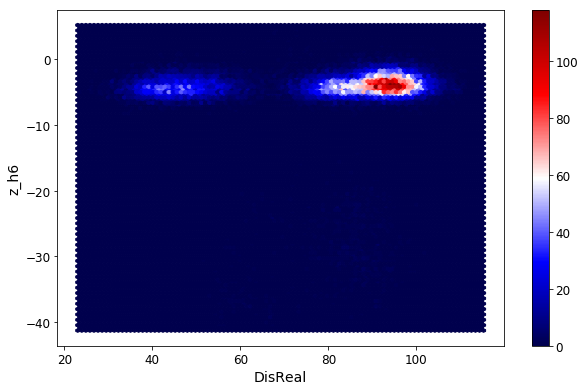

In [60]:
rerun1.query("Temp <= 300 and z_h1 < -10").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

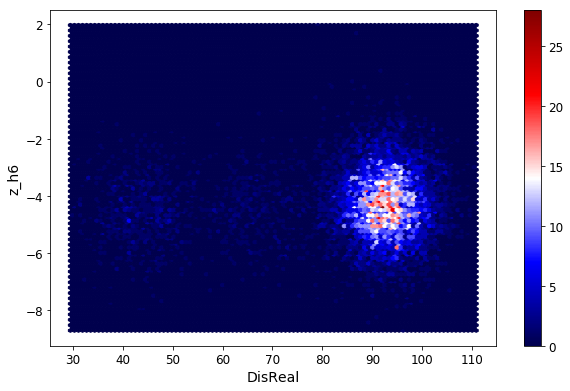

In [300]:
rerun5.query("Temp <= 300 and z_h1 < -10").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

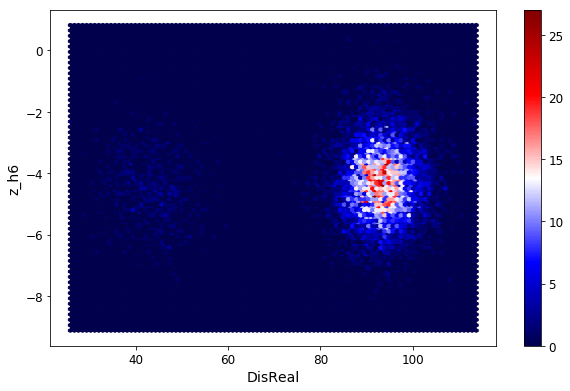

In [7]:
data.query("Temp <= 300 and z_h1 < -10").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

## Good, decrease in number

In [61]:
data.query("Temp <= 300")["DisReal"].count()

270000

In [62]:
data.query("Temp <= 300 and z_h1 < -10")["DisReal"].describe()

count    15664.000000
mean        86.338072
std         16.724329
min         23.835159
25%         84.224392
50%         91.396990
75%         96.274063
max        115.018263
Name: DisReal, dtype: float64

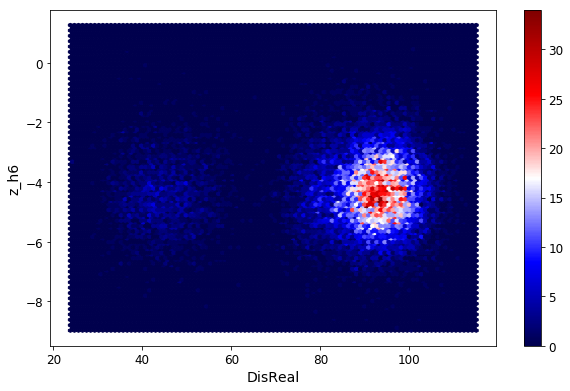

In [63]:
data.query("Temp <= 300 and z_h1 < -10").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

## enhance h1, h2 connection. 
check if it increase the unfolding force, and if the helix 5,6 unfold first. (how strong h1,h2 bond needs to be)

In [27]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/05_week/unfold_strengthen_h1_h2/03_Apr_233639.feather")

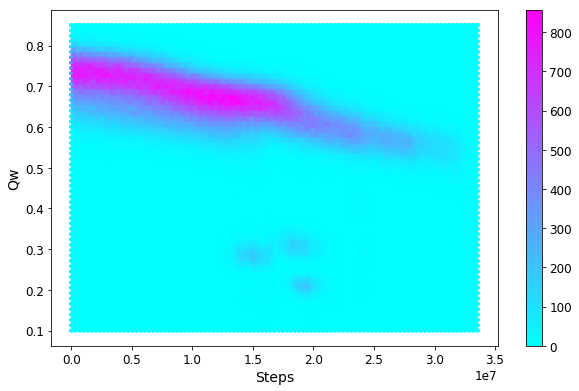

In [76]:
data.query("Steps < 4e7 and Qw > 0.1").plot.hexbin("Steps", "Qw", by="Temp", cmap="cool", sharex=False)

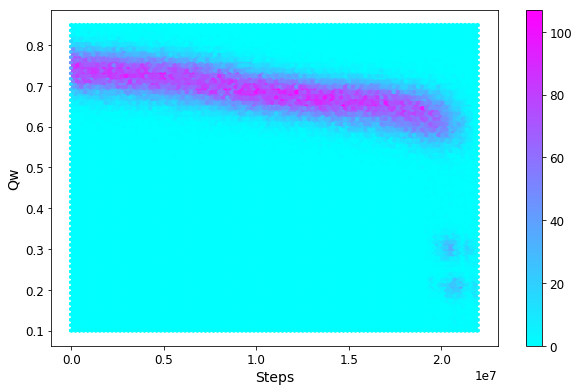

In [16]:
data.query("Folder == 'force_3_' and Steps < 3e7 and Qw > 0.1").plot.hexbin("Steps", "Qw", by="Temp", cmap="cool", sharex=False)

In [28]:
data["Run"] = data["Run"].apply(pd.to_numeric)

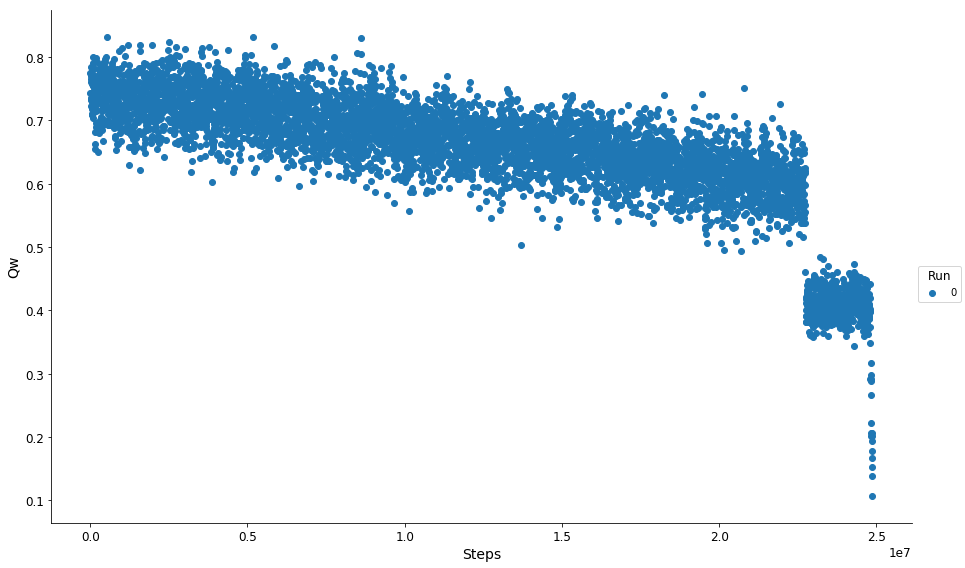

In [29]:
fg = sns.FacetGrid(data=data.query("Steps < 4e7 and Qw > 0.1 and Folder=='force_6_' and Run ==0"), hue='Run', size=8, aspect=1.61)
fg.map(plt.scatter, 'Steps', 'Qw').add_legend()

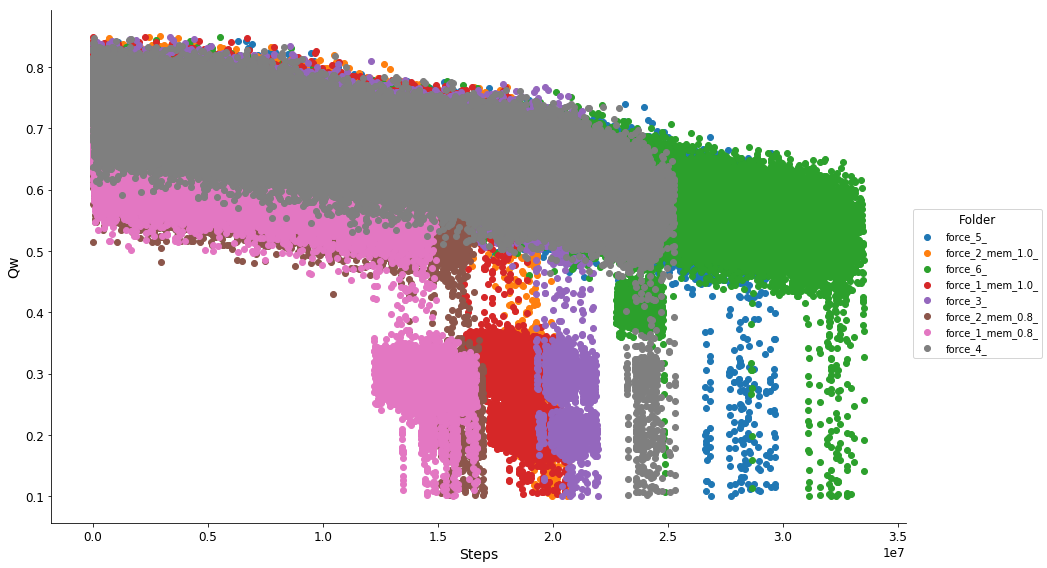

In [77]:
fg = sns.FacetGrid(data=data.query("Steps < 4e7 and Qw > 0.1"), hue='Folder', size=8, aspect=1.61)
fg.map(plt.scatter, 'Steps', 'Qw').add_legend()

In [79]:
a = data.query("(z_h6 > -10 and z_h1 < -10) or (z_h6 < -10 and z_h1 > -10)")

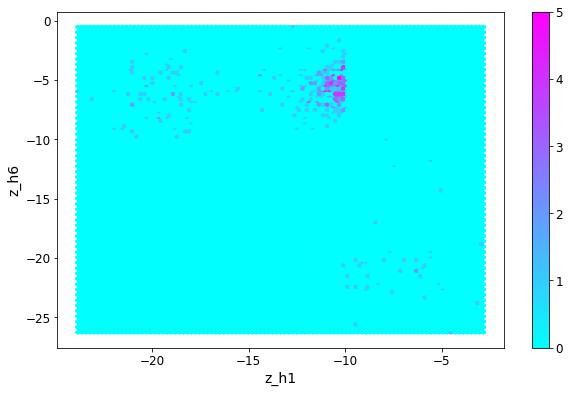

In [80]:
a.query("Folder == 'force_6_'").plot.hexbin("z_h1", "z_h6", cmap="cool", sharex=False)

In [15]:
data["Folder"].unique()

array(['force_2_mem_1.0_', 'force_1_mem_1.0_', 'force_3_',
       'force_2_mem_0.8_', 'force_1_mem_0.8_', 'force_4_'], dtype=object)